In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import matplotlib.dates as mdates

from common_plotting import read_data, find_file, add_thp
from common_analysis import  combine_stds_sum, combine_stds_mean

plt.rcParams["figure.figsize"] = (10,4)
plt.rc('font', size=14)

# Load data

In [46]:
thp_data, data = read_data(['ks3458a1-dcv-log.csv', 'k199-x2-3458A-x2-F730A-PM2534-log.csv', 'k199-x2-3458A-x2-F730A-MV106-PM2534-log.csv'])
absolute_data_3458a_1 = data['ks3458a1-dcv-log.csv']
old_data_1 = data['k199-x2-3458A-x2-F730A-PM2534-log.csv']
old_data_2 = data['k199-x2-3458A-x2-F730A-MV106-PM2534-log.csv']


In [47]:
ut330c_data = pd.read_csv(find_file('UNT330C_20231108_052203.log.csv'), parse_dates=['DateTime'], encoding='latin_1')
ut330c_data['datetime_corrected'] = ut330c_data['DateTime'] - pd.Timedelta('1h')
ut330c = ut330c_data.drop(['  NO.', '°F', 'DateTime'], axis=1).set_index('datetime_corrected').dropna()
ut330c.columns= ['temperature', 'humidity', 'pressure', 'dew_point']

# 2023-11-08

In [48]:
f730a_data = absolute_data_3458a_1[(absolute_data_3458a_1.index > pd.Timestamp(2023,11,7,0)) & (absolute_data_3458a_1.index < pd.Timestamp(2023,11,9,0))].rename(columns={'temperature': 'BME280_temperature', 'humidity': 'BME280_humidity', 'pressure': 'BME280_pressure'}, inplace=False)
f730a_data_with_ut330c_data = add_thp(ut330c, f730a_data.reset_index()).rename(columns={'temperature': 'UT330C_temperature', 'humidity': 'UT330C_humidity', 'pressure': 'UT330C_pressure'}, inplace=False)
grouped_by_dut_and_setting = f730a_data_with_ut330c_data.groupby(['dut', 'dut_setting']).agg({'ag3458a_1_dcv': ['mean', 'std', 'sem', 'count'], 'BME280_temperature': ['mean', 'std'], 'BME280_pressure': ['mean', 'std'], 'BME280_humidity': ['mean', 'std'], 'UT330C_temperature': ['mean', 'std'], 'UT330C_pressure': ['mean', 'std'], 'UT330C_humidity': ['mean', 'std']}).reset_index()
grouped_by_dut_and_setting['polarity_corrected_dcv'] = grouped_by_dut_and_setting[('ag3458a_1_dcv', 'mean')] * np.sign(grouped_by_dut_and_setting[('dut_setting', '')].str.slice(0, 2).astype(float))
grouped_by_dut = grouped_by_dut_and_setting.groupby('dut').agg({('polarity_corrected_dcv', ''): ['mean'], ('ag3458a_1_dcv', 'std'): combine_stds_sum, ('ag3458a_1_dcv', 'sem'): combine_stds_mean, ('ag3458a_1_dcv', 'count'): 'sum', ('BME280_temperature', 'mean'): 'mean', ('BME280_temperature', 'std'): combine_stds_sum, ('BME280_pressure', 'mean'): 'mean', ('BME280_pressure', 'std'): combine_stds_sum, ('BME280_humidity', 'mean'): 'mean', ('BME280_humidity', 'std'): combine_stds_sum, ('UT330C_temperature', 'mean'): 'mean', ('UT330C_temperature', 'std'): combine_stds_sum, ('UT330C_pressure', 'mean'): 'mean', ('UT330C_pressure', 'std'): combine_stds_sum, ('UT330C_humidity', 'mean'): 'mean', ('UT330C_humidity', 'std'): combine_stds_sum})
grouped_by_dut.columns = pd.MultiIndex.from_tuples([('ag3458a_1_dcv', 'mean'), ('ag3458a_1_dcv', 'std'), ('ag3458a_1_dcv', 'sem'), ('ag3458a_1_dcv', 'count'), ('BME280_temperature', 'mean'), ('BME280_temperature', 'std'), ('BME280_pressure', 'mean'), ('BME280_pressure', 'std'), ('BME280_humidity', 'mean'), ('BME280_humidity', 'std'), ('UT330C_temperature', 'mean'), ('UT330C_temperature', 'std'), ('UT330C_pressure', 'mean'), ('UT330C_pressure', 'std'), ('UT330C_humidity', 'mean'), ('UT330C_humidity', 'std')])
display(grouped_by_dut)

ag3458a_1_dcv                                   BME280_temperature  \
                   mean           std           sem count               mean   
dut                                                                            
D4700+10V      9.996917  8.478708e-06  1.016974e-06    69          30.180954   
D4700-10V      9.996927  1.015181e-05  1.211364e-06    72          30.146237   
F7001bat       9.999930  8.405889e-07  5.645004e-08   212          30.257730   
F730a1        10.000039  8.646957e-07  9.061145e-08    89          30.121589   
F730a2         9.999128  6.926842e-04  6.800414e-05   102          30.026830   
F730a3        10.000108  1.319563e-04  1.044531e-05   121          30.033736   
F730a4         9.999524  6.222024e-06  6.786934e-07    87          30.002380   

                    BME280_pressure           BME280_humidity            \
                std            mean       std            mean       std   
dut                                                                       
D4700+10V  0.037211     1010.294970  0.036860       29.272153  0.128715   
D4700-10V  0.054305     1010.307495  0.041050       29.329319  0.132259   
F7001bat   0.371602     1010.337390  0.053358       29.171316  0.439125   
F730a1     0.056079     1010.315694  0.031982       29.311146  0.180132   
F730a2     0.049135     1010.293022  0.029657       29.352684  0.150693   
F730a3     0.065396     1010.332743  0.041112       29.349811  0.190871   
F730a4     0.079282     1010.353649  0.023401       29.449564  0.193116   

          UT330C_temperature      UT330C_pressure      UT330C_humidity       
                        mean  std            mean  std            mean  std  
dut                                                                          
D4700+10V               26.3  0.0          1024.2  0.0            48.8  0.0  
D4700-10V               26.3  0.0          1024.2  0.0            48.8  0.0  
F7001bat                26.3  0.0          1024.2  0.0            48.8  0.0  
F730a1                  26.3  0.0          1024.2  0.0            48.8  0.0  
F730a2                  26.3  0.0          1024.2  0.0            48.8  0.0  
F730a3                  26.3  0.0          1024.2  0.0            48.8  0.0  
F730a4                  26.3  0.0          1024.2  0.0            48.8  0.0

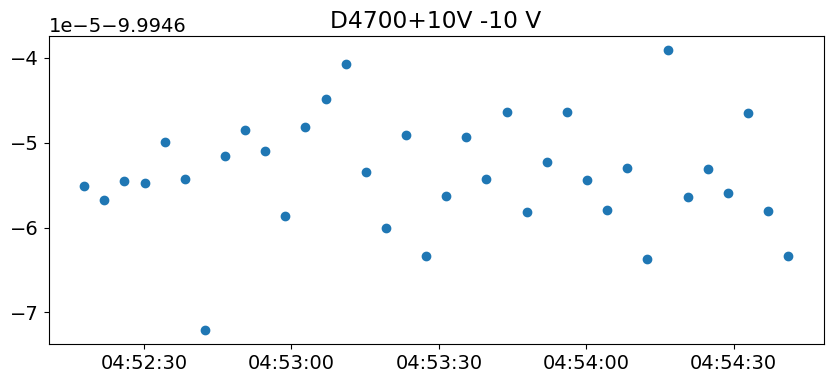

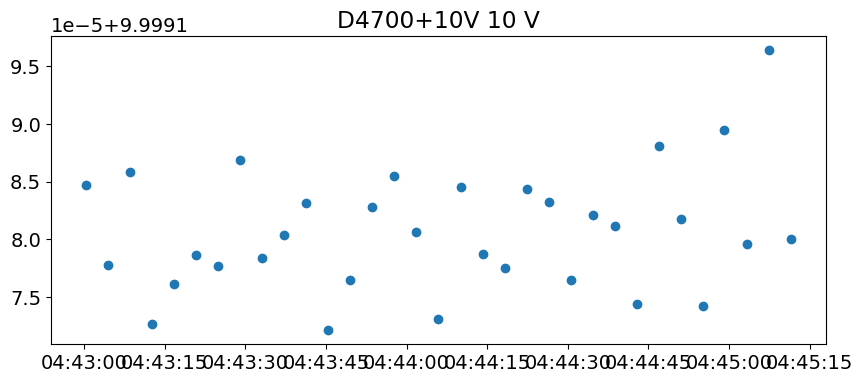

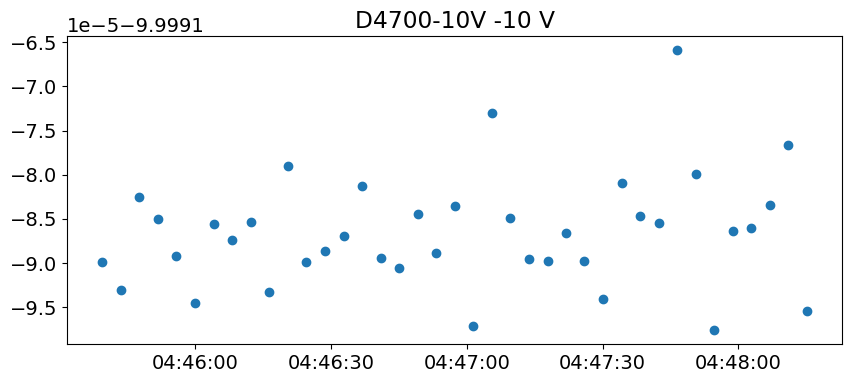

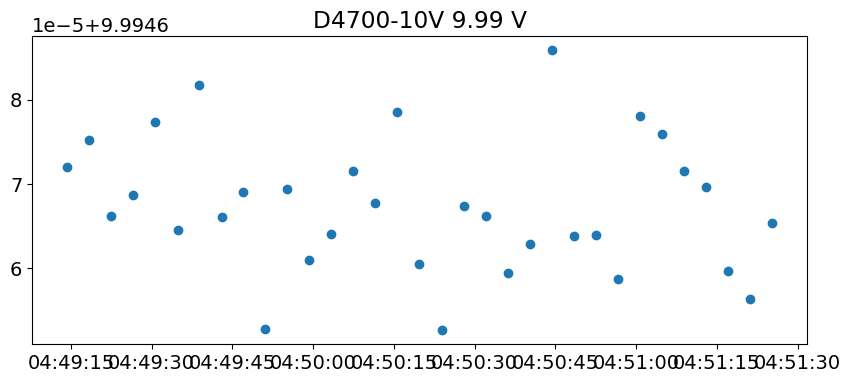

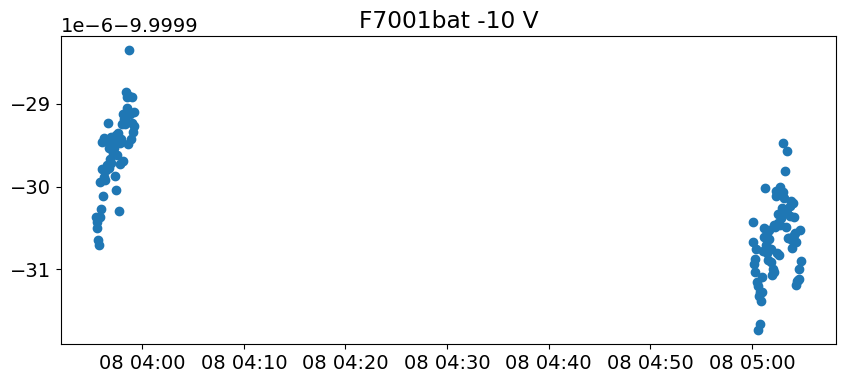

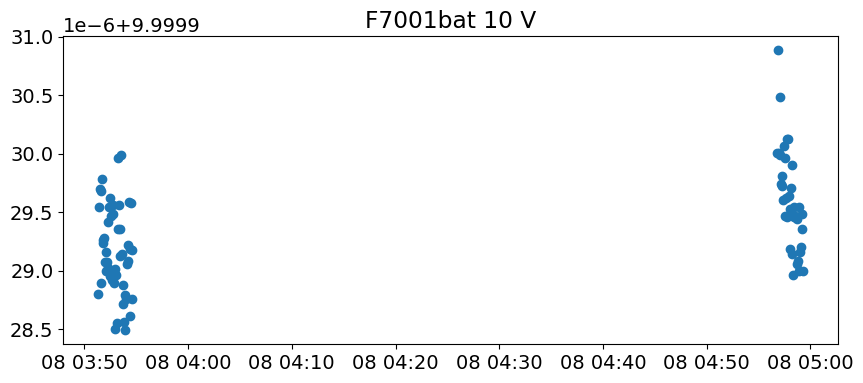

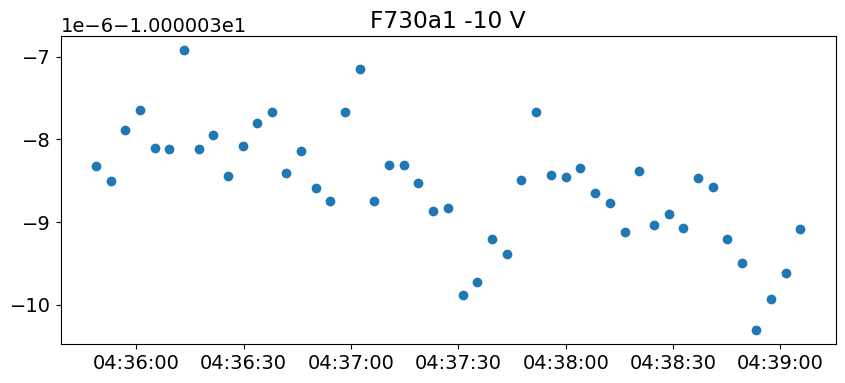

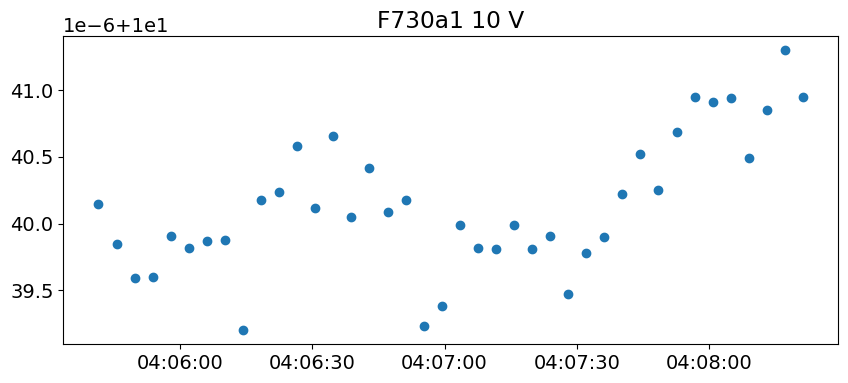

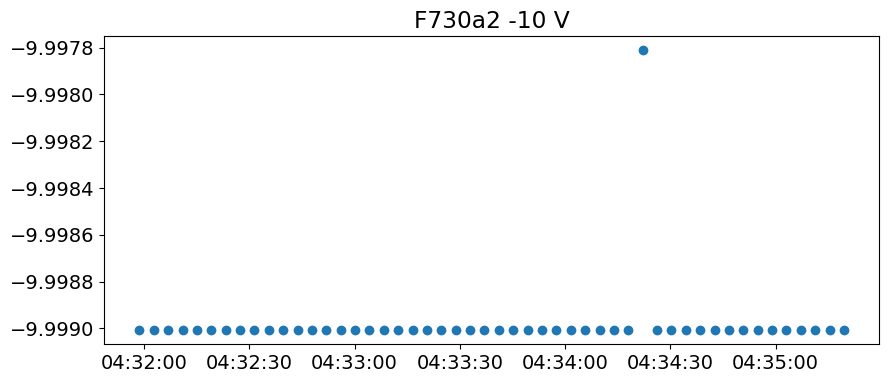

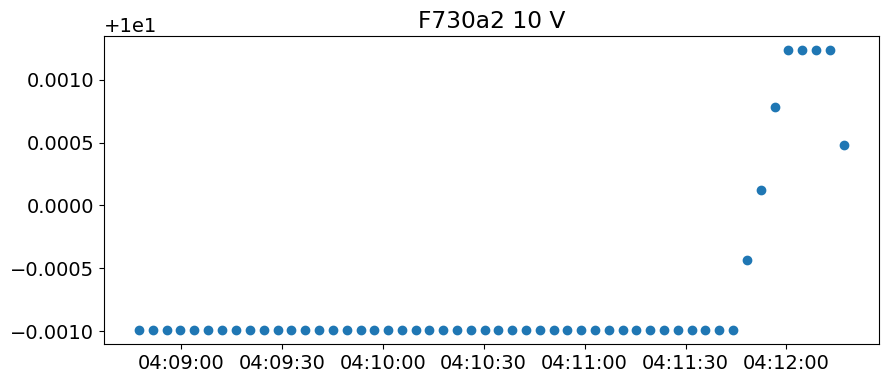

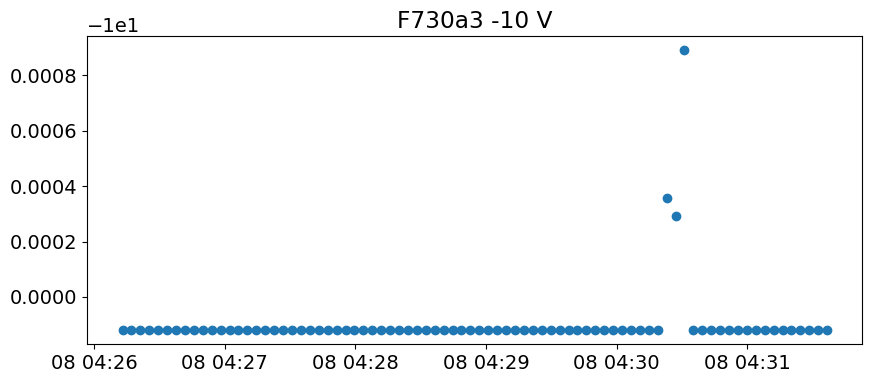

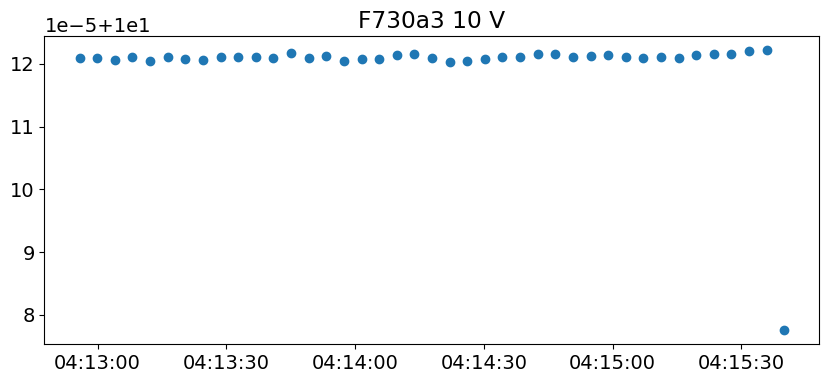

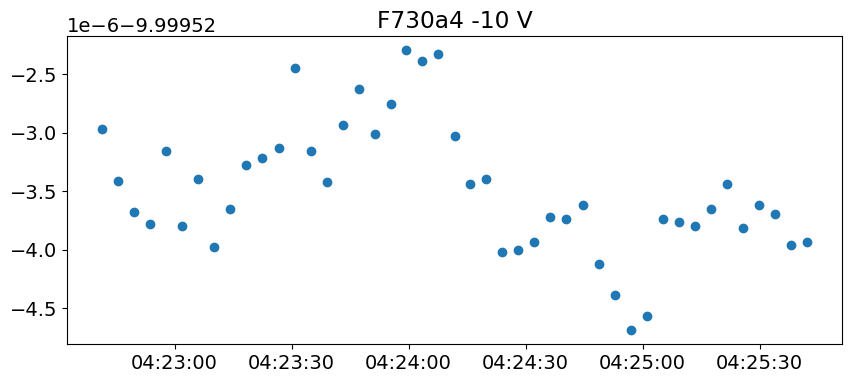

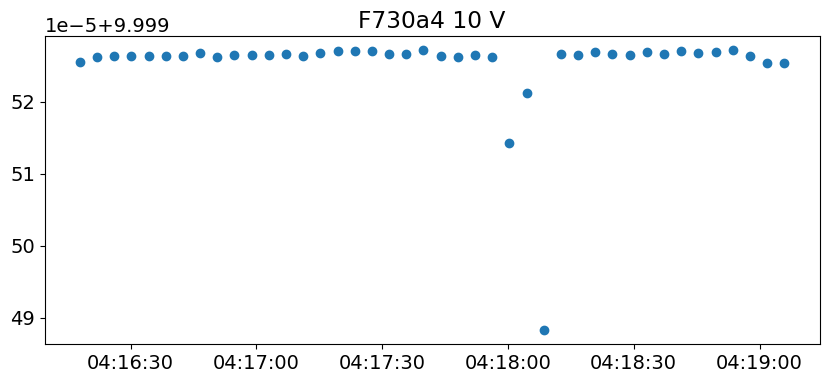

In [49]:
group_data = f730a_data_with_ut330c_data
group_means = group_data.groupby(['dut', 'dut_setting']).agg({'ag3458a_1_dcv': 'mean'})
for group_mean in group_means.iterrows():
    group = group_data[(group_data.dut == group_mean[0][0]) & (group_data.dut_setting == group_mean[0][1])].copy()
    plt.scatter(group.index, group['ag3458a_1_dcv'])
    plt.title(f"{group_mean[0][0]} {group_mean[0][1]}")
    plt.show()

# 2018

## 2018-03

In [50]:
old_data_1

pm2534_ch1_2  k199_ch1_3  k199_ch1_4  \
datetime                                                           
2018-03-04 21:28:23.247567     -0.000757    0.000103   -0.000295   
2018-03-04 21:28:34.935183     -0.000758    0.000101   -0.000296   
2018-03-04 21:28:46.595893     -0.000758    0.000101   -0.000296   
2018-03-04 21:28:58.254489     -0.000758    0.000103   -0.000295   
2018-03-04 21:29:09.915420     -0.000758    0.000103   -0.000296   
...                                  ...         ...         ...   
2018-03-31 11:07:15.791640     -0.814969    0.000074   -0.000379   
2018-03-31 11:07:27.763647     -0.814768    0.000074   -0.000378   
2018-03-31 11:07:39.740450     -0.814712    0.000073   -0.000378   
2018-03-31 11:07:51.721515     -0.814592    0.000074   -0.000378   
2018-03-31 11:08:03.695170     -0.814349    0.000073   -0.000377   

                            ag3458a_1_ch1  temp_1                 last_acal_1  \
datetime                                                                        
2018-03-04 21:28:23.247567       9.999992    42.6  2018-03-04T21:25:22.876791   
2018-03-04 21:28:34.935183       9.999991    42.6  2018-03-04T21:25:22.876791   
2018-03-04 21:28:46.595893       9.999992    42.6  2018-03-04T21:25:22.876791   
2018-03-04 21:28:58.254489       9.999992    42.6  2018-03-04T21:25:22.876791   
2018-03-04 21:29:09.915420       9.999993    42.6  2018-03-04T21:25:22.876791   
...                                   ...     ...                         ...   
2018-03-31 11:07:15.791640      10.000007    41.2  2018-03-31T03:12:56.133073   
2018-03-31 11:07:27.763647      10.000007    41.2  2018-03-31T03:12:56.133073   
2018-03-31 11:07:39.740450      10.000008    41.2  2018-03-31T03:12:56.133073   
2018-03-31 11:07:51.721515      10.000007    41.2  2018-03-31T03:12:56.133073   
2018-03-31 11:08:03.695170      10.000007    41.2  2018-03-31T03:12:56.133073   

                            last_acal_1_cal72  ag3458a_2_ch1  temp_2  \
datetime                                                               
2018-03-04 21:28:23.247567           1.000713      10.000004    45.3   
2018-03-04 21:28:34.935183           1.000713      10.000004    45.3   
2018-03-04 21:28:46.595893           1.000713      10.000006    45.3   
2018-03-04 21:28:58.254489           1.000713      10.000005    45.3   
2018-03-04 21:29:09.915420           1.000713      10.000005    45.3   
...                                       ...            ...     ...   
2018-03-31 11:07:15.791640           1.000713      10.000013    44.6   
2018-03-31 11:07:27.763647           1.000713      10.000012    44.5   
2018-03-31 11:07:39.740450           1.000713      10.000012    44.5   
2018-03-31 11:07:51.721515           1.000713      10.000012    44.5   
2018-03-31 11:08:03.695170           1.000713      10.000012    44.5   

                                           last_acal_2  last_acal_2_cal72  \
datetime                                                                    
2018-03-04 21:28:23.247567  2018-03-04T21:25:22.894351           0.999420   
2018-03-04 21:28:34.935183  2018-03-04T21:25:22.894351           0.999420   
2018-03-04 21:28:46.595893  2018-03-04T21:25:22.894351           0.999420   
2018-03-04 21:28:58.254489  2018-03-04T21:25:22.894351           0.999420   
2018-03-04 21:29:09.915420  2018-03-04T21:25:22.894351           0.999420   
...                                                ...                ...   
2018-03-31 11:07:15.791640  2018-03-31T04:44:17.049313           0.999414   
2018-03-31 11:07:27.763647  2018-03-31T04:44:17.049313           0.999414   
2018-03-31 11:07:39.740450  2018-03-31T04:44:17.049313           0.999414   
2018-03-31 11:07:51.721515  2018-03-31T04:44:17.049313           0.999414   
2018-03-31 11:08:03.695170  2018-03-31T04:44:17.049313           0.999414   

                            temperature    pressure   humidity  
datetime                                                        
2018-03-04 21:28:23.

In [51]:
old_data_1_acal = old_data_1[(old_data_1.last_acal_2 != old_data_1.last_acal_2.shift(1)) & (old_data_1.ag3458a_1_ch1 > 9.9995)]

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    188898.000000
mean          9.999993
std           0.000007
min           9.999898
25%           9.999988
50%           9.999992
75%           9.999997
max          10.000022
Name: ag3458a_1_ch1, dtype: float64

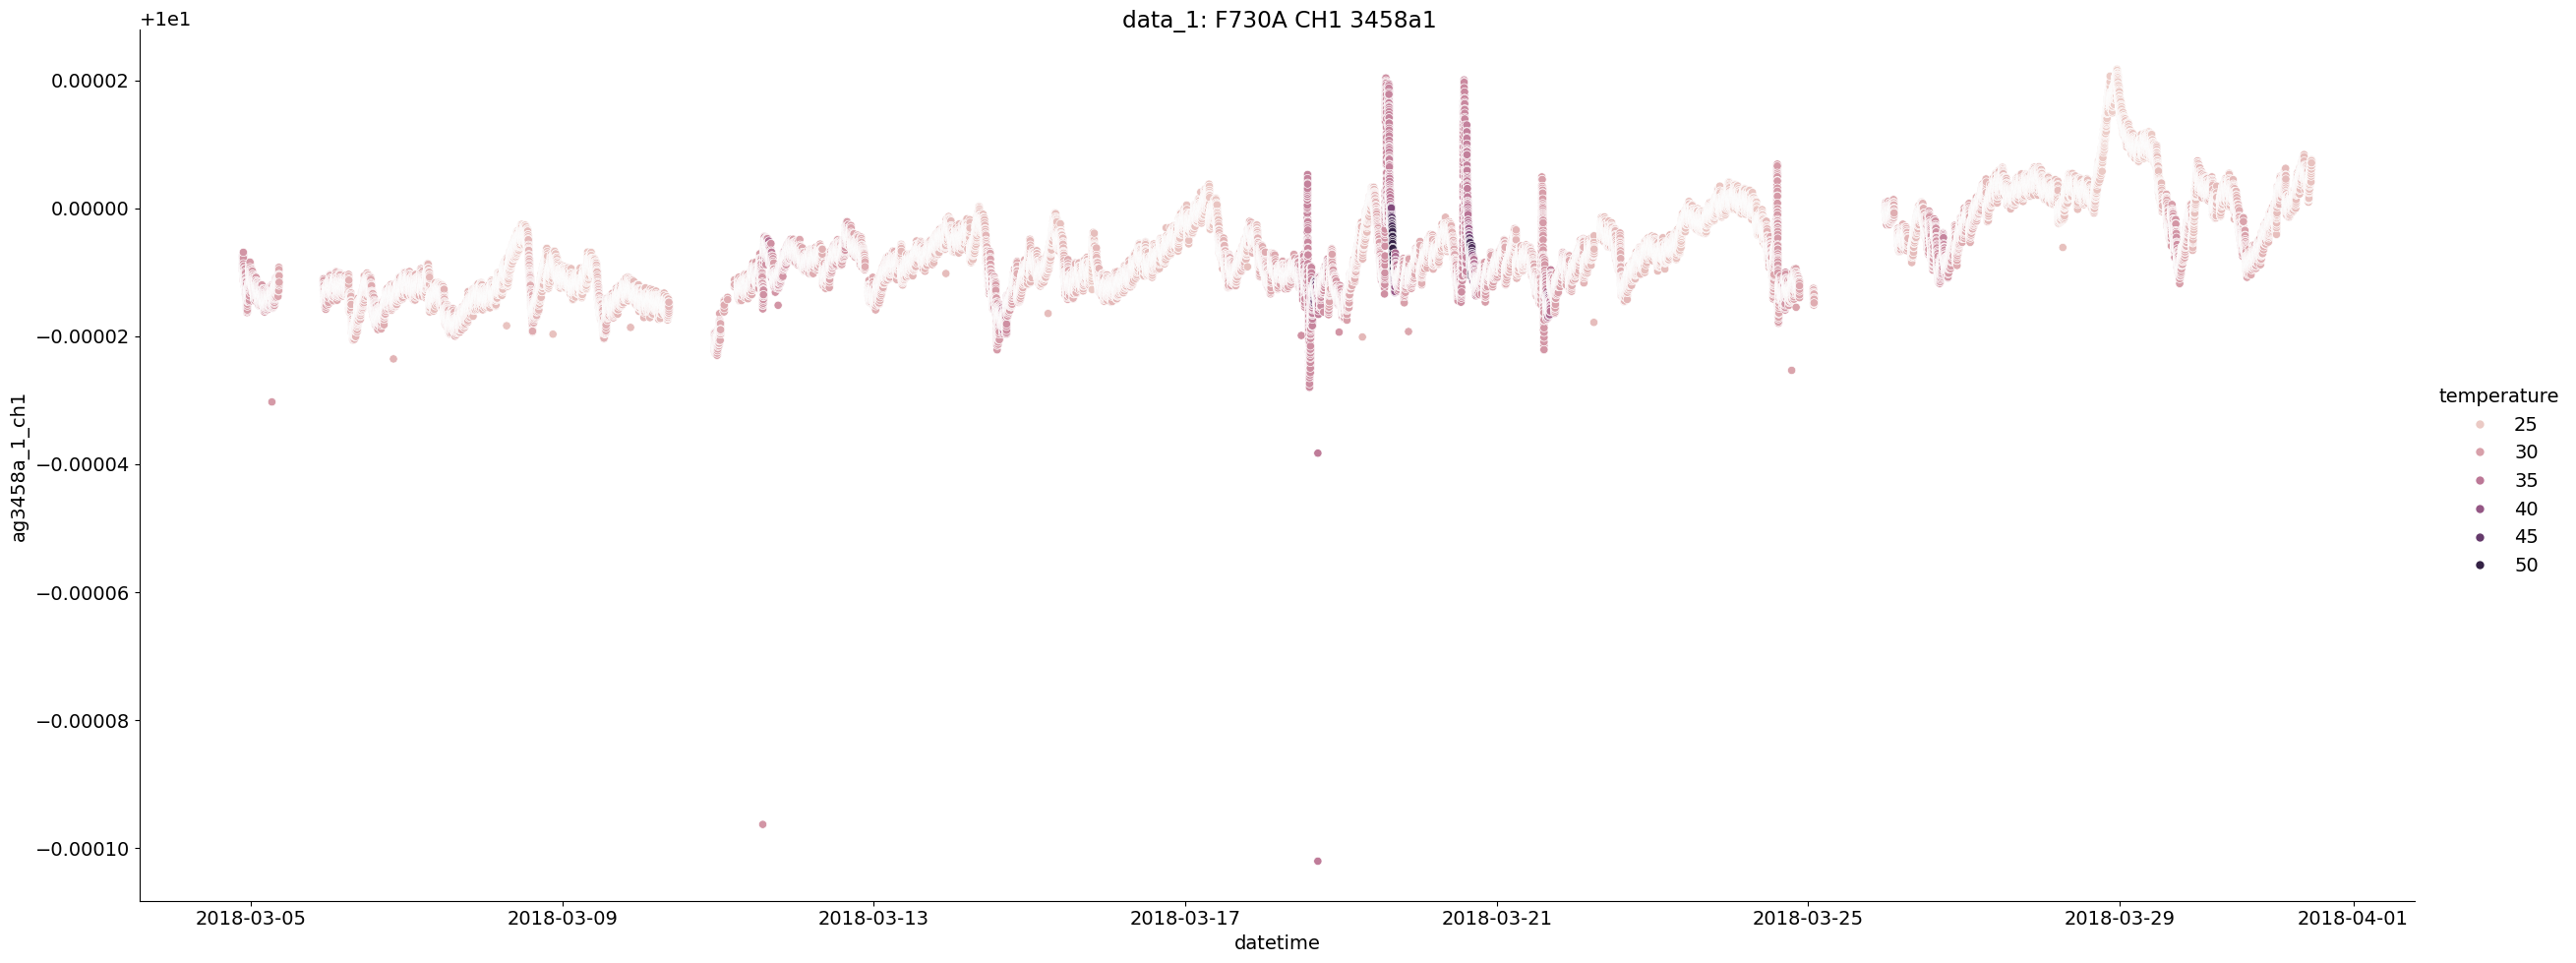

In [52]:
old_data_ch1_3458a1 = old_data_1[(old_data_1.ag3458a_1_ch1 > 9.9995)]
rel = sns.relplot(data=old_data_ch1_3458a1.reset_index(), x='datetime', y='ag3458a_1_ch1', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1 3458a1')
old_data_ch1_3458a1['ag3458a_1_ch1'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    97.000000
mean      9.999992
std       0.000006
min       9.999981
25%       9.999988
50%       9.999991
75%       9.999995
max      10.000017
Name: ag3458a_1_ch1, dtype: float64

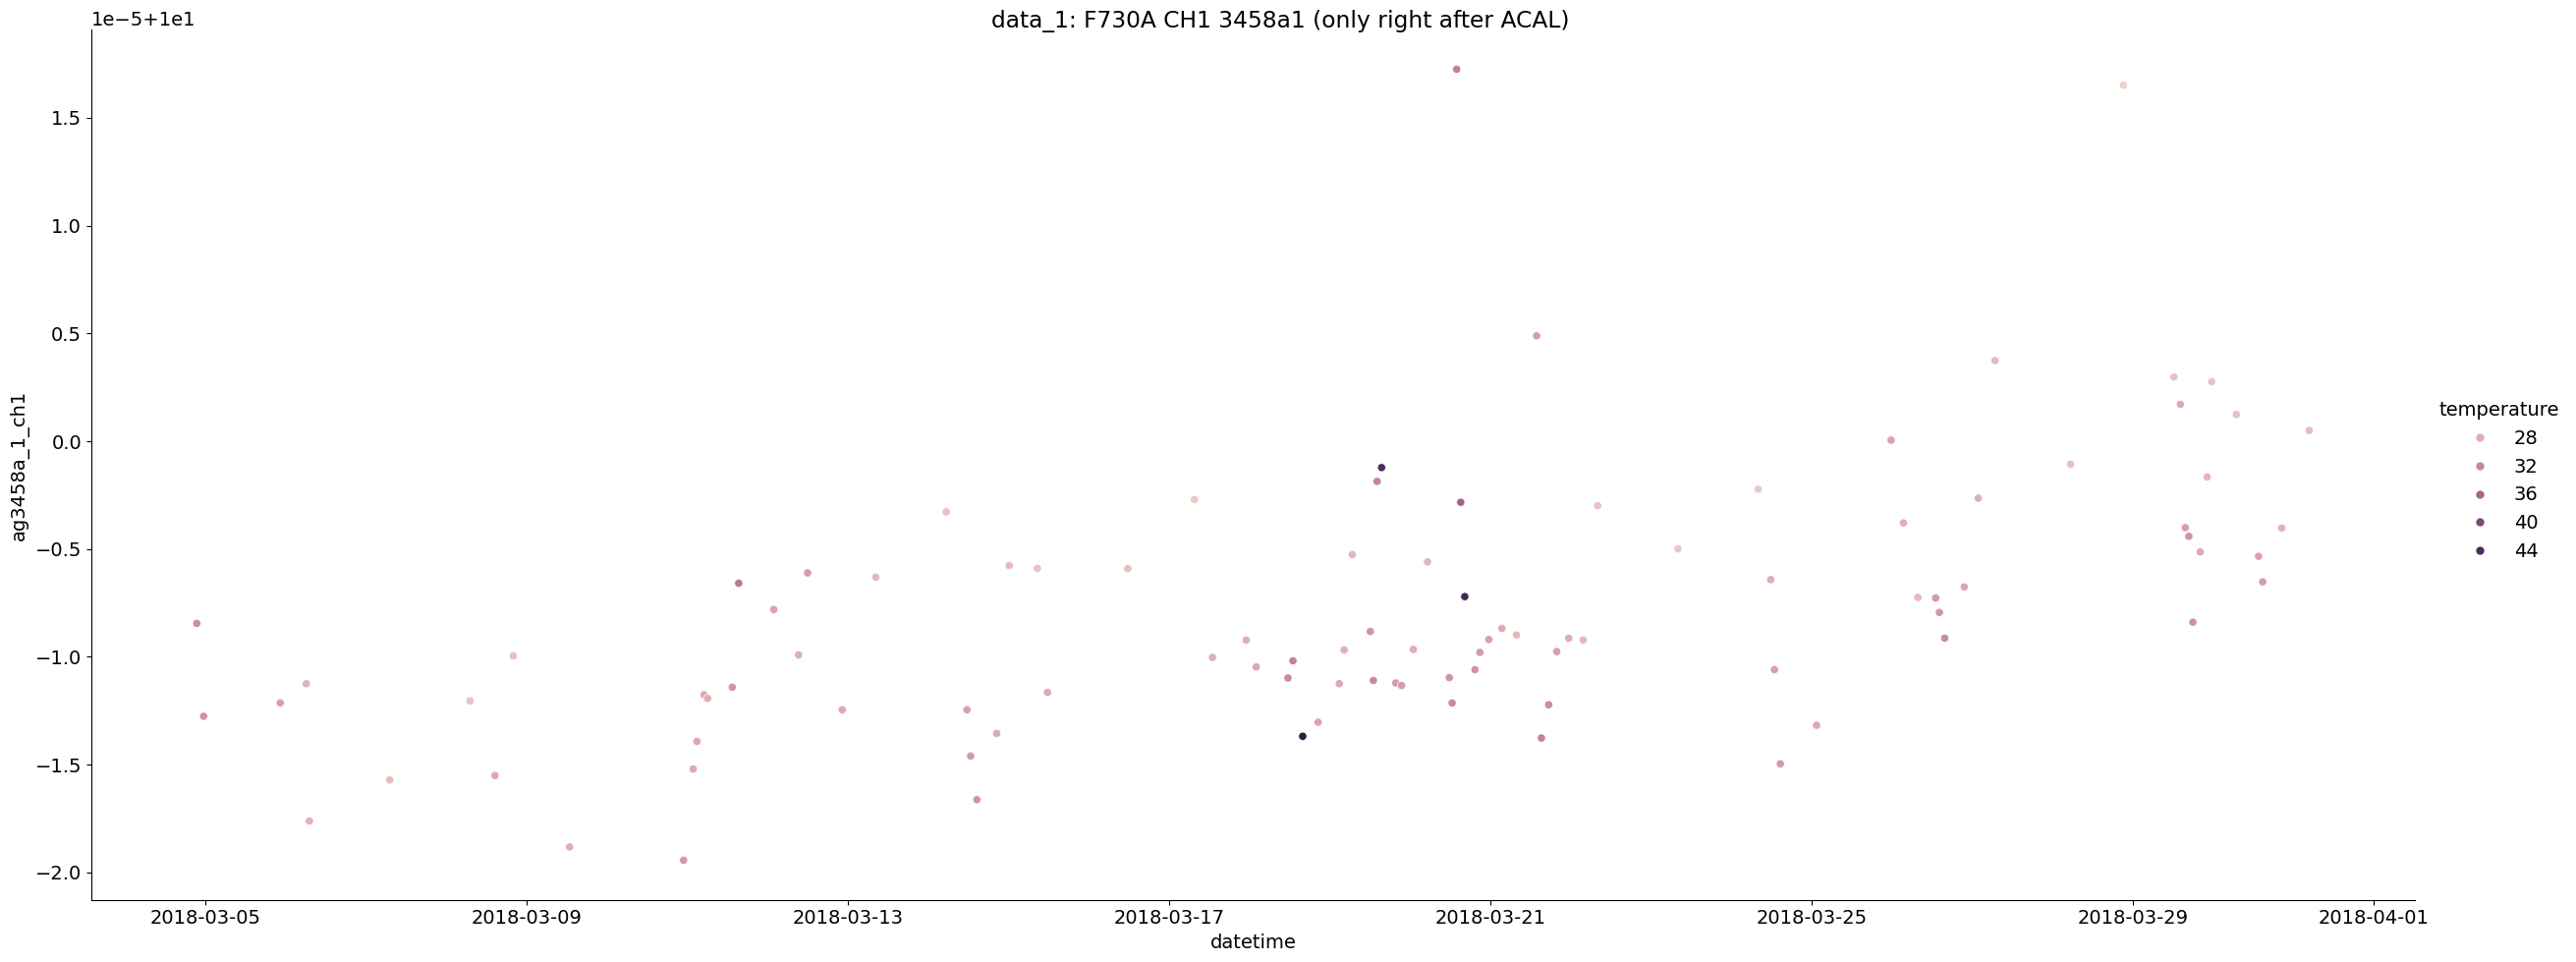

In [53]:
rel = sns.relplot(data=old_data_1_acal.reset_index(), x='datetime', y='ag3458a_1_ch1', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1 3458a1 (only right after ACAL)')
old_data_1_acal['ag3458a_1_ch1'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    188898.000000
mean         10.000002
std           0.000006
min           9.999965
25%           9.999998
50%          10.000001
75%          10.000006
max          10.000031
Name: ag3458a_2_ch1, dtype: float64

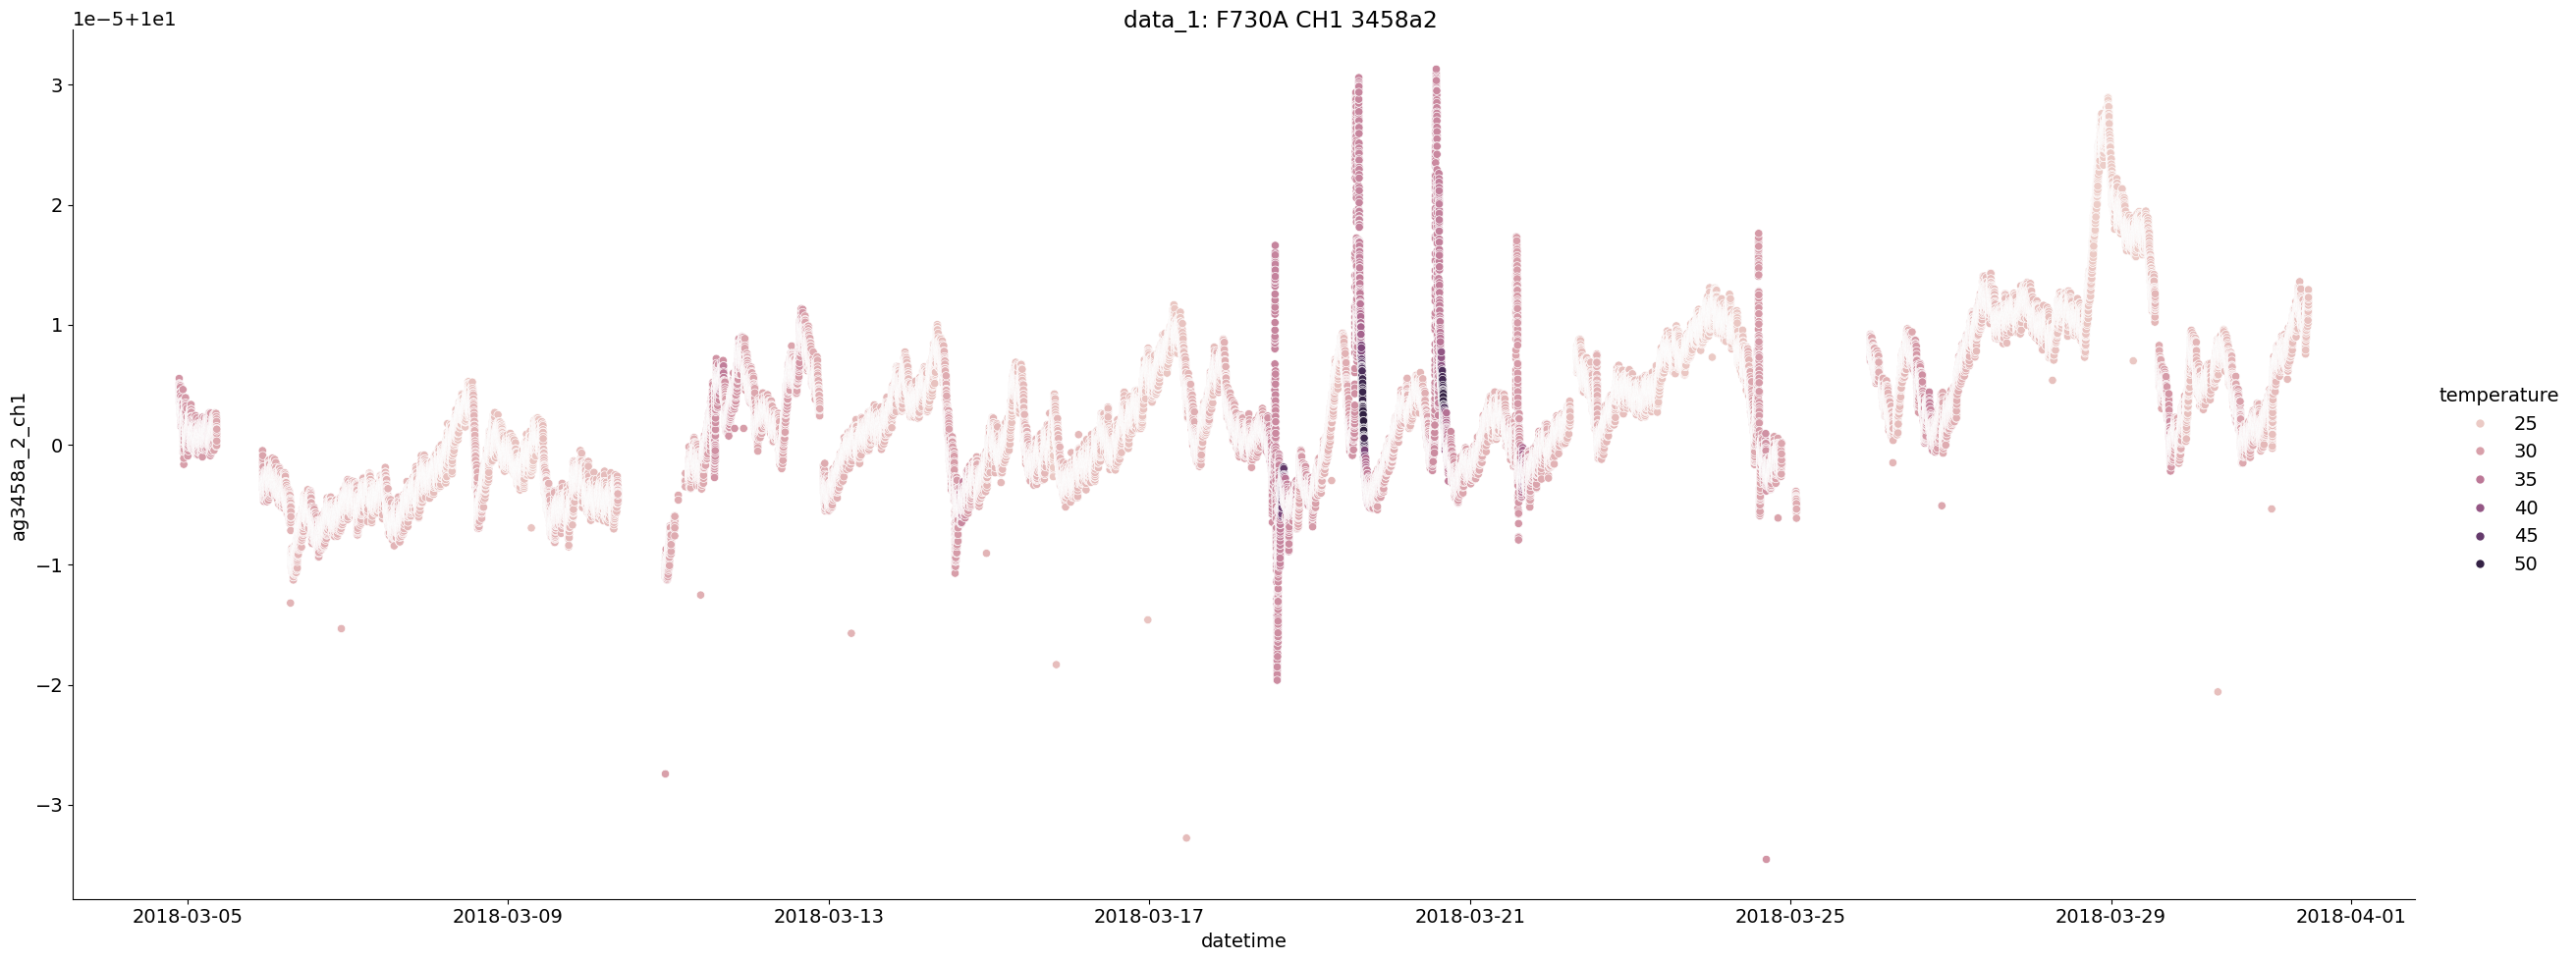

In [54]:
old_data_1_ch1_3458a2 = old_data_1[old_data_1.ag3458a_2_ch1 > 10-0.00004]
rel = sns.relplot(data=old_data_1_ch1_3458a2.reset_index(), x='datetime', y='ag3458a_2_ch1', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1 3458a2')
old_data_1_ch1_3458a2['ag3458a_2_ch1'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    97.000000
mean     10.000002
std       0.000006
min       9.999990
25%       9.999998
50%      10.000001
75%      10.000004
max      10.000029
Name: ag3458a_2_ch1, dtype: float64

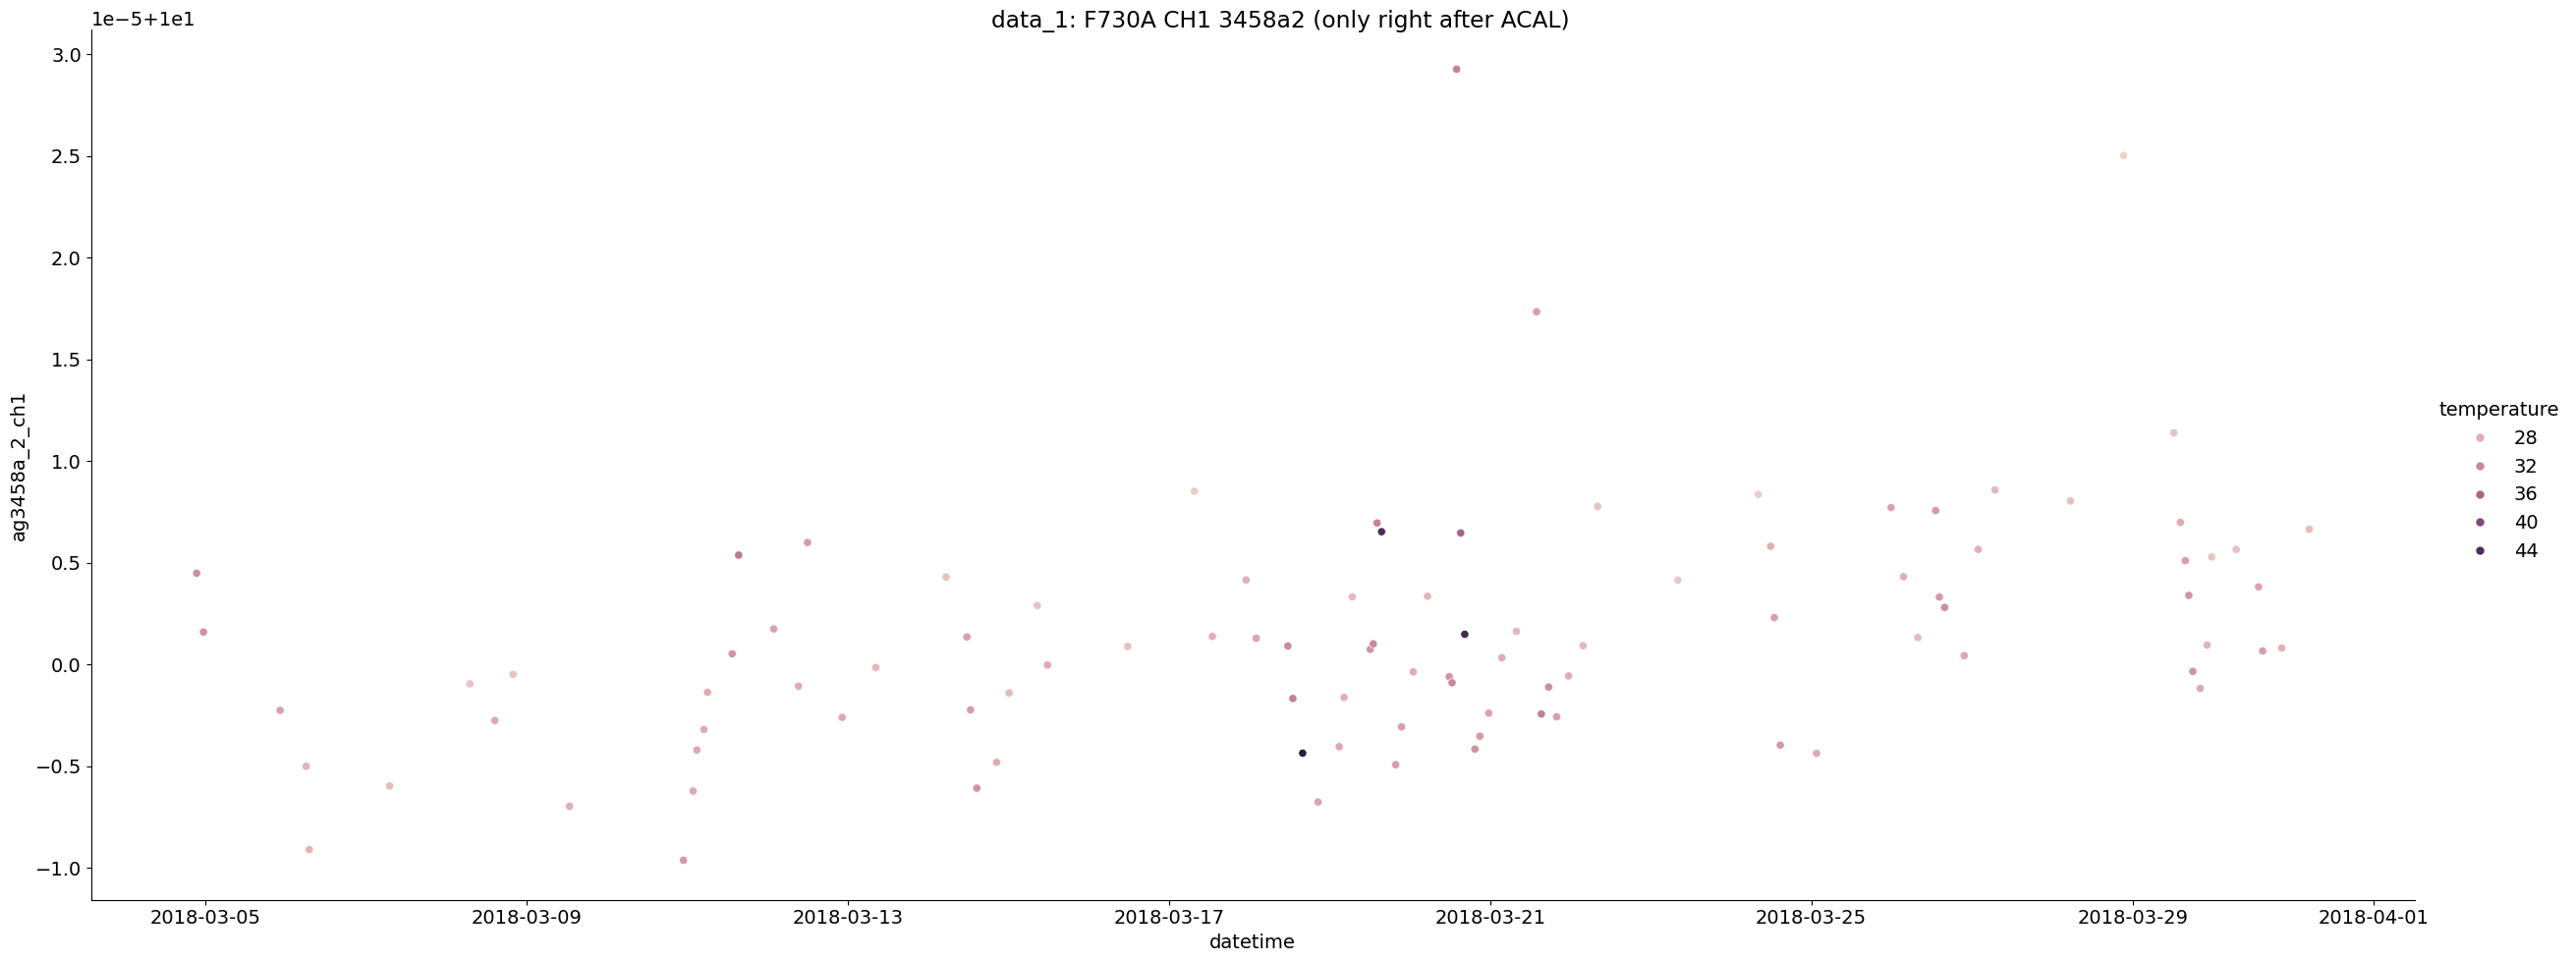

In [55]:
rel = sns.relplot(data=old_data_1_acal.reset_index(), x='datetime', y='ag3458a_2_ch1', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1 3458a2 (only right after ACAL)')
old_data_1_acal['ag3458a_2_ch1'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    78736.000000
mean        -0.000756
std          0.000009
min         -0.000773
25%         -0.000763
50%         -0.000758
75%         -0.000749
max         -0.000730
Name: pm2534_ch1_2, dtype: float64

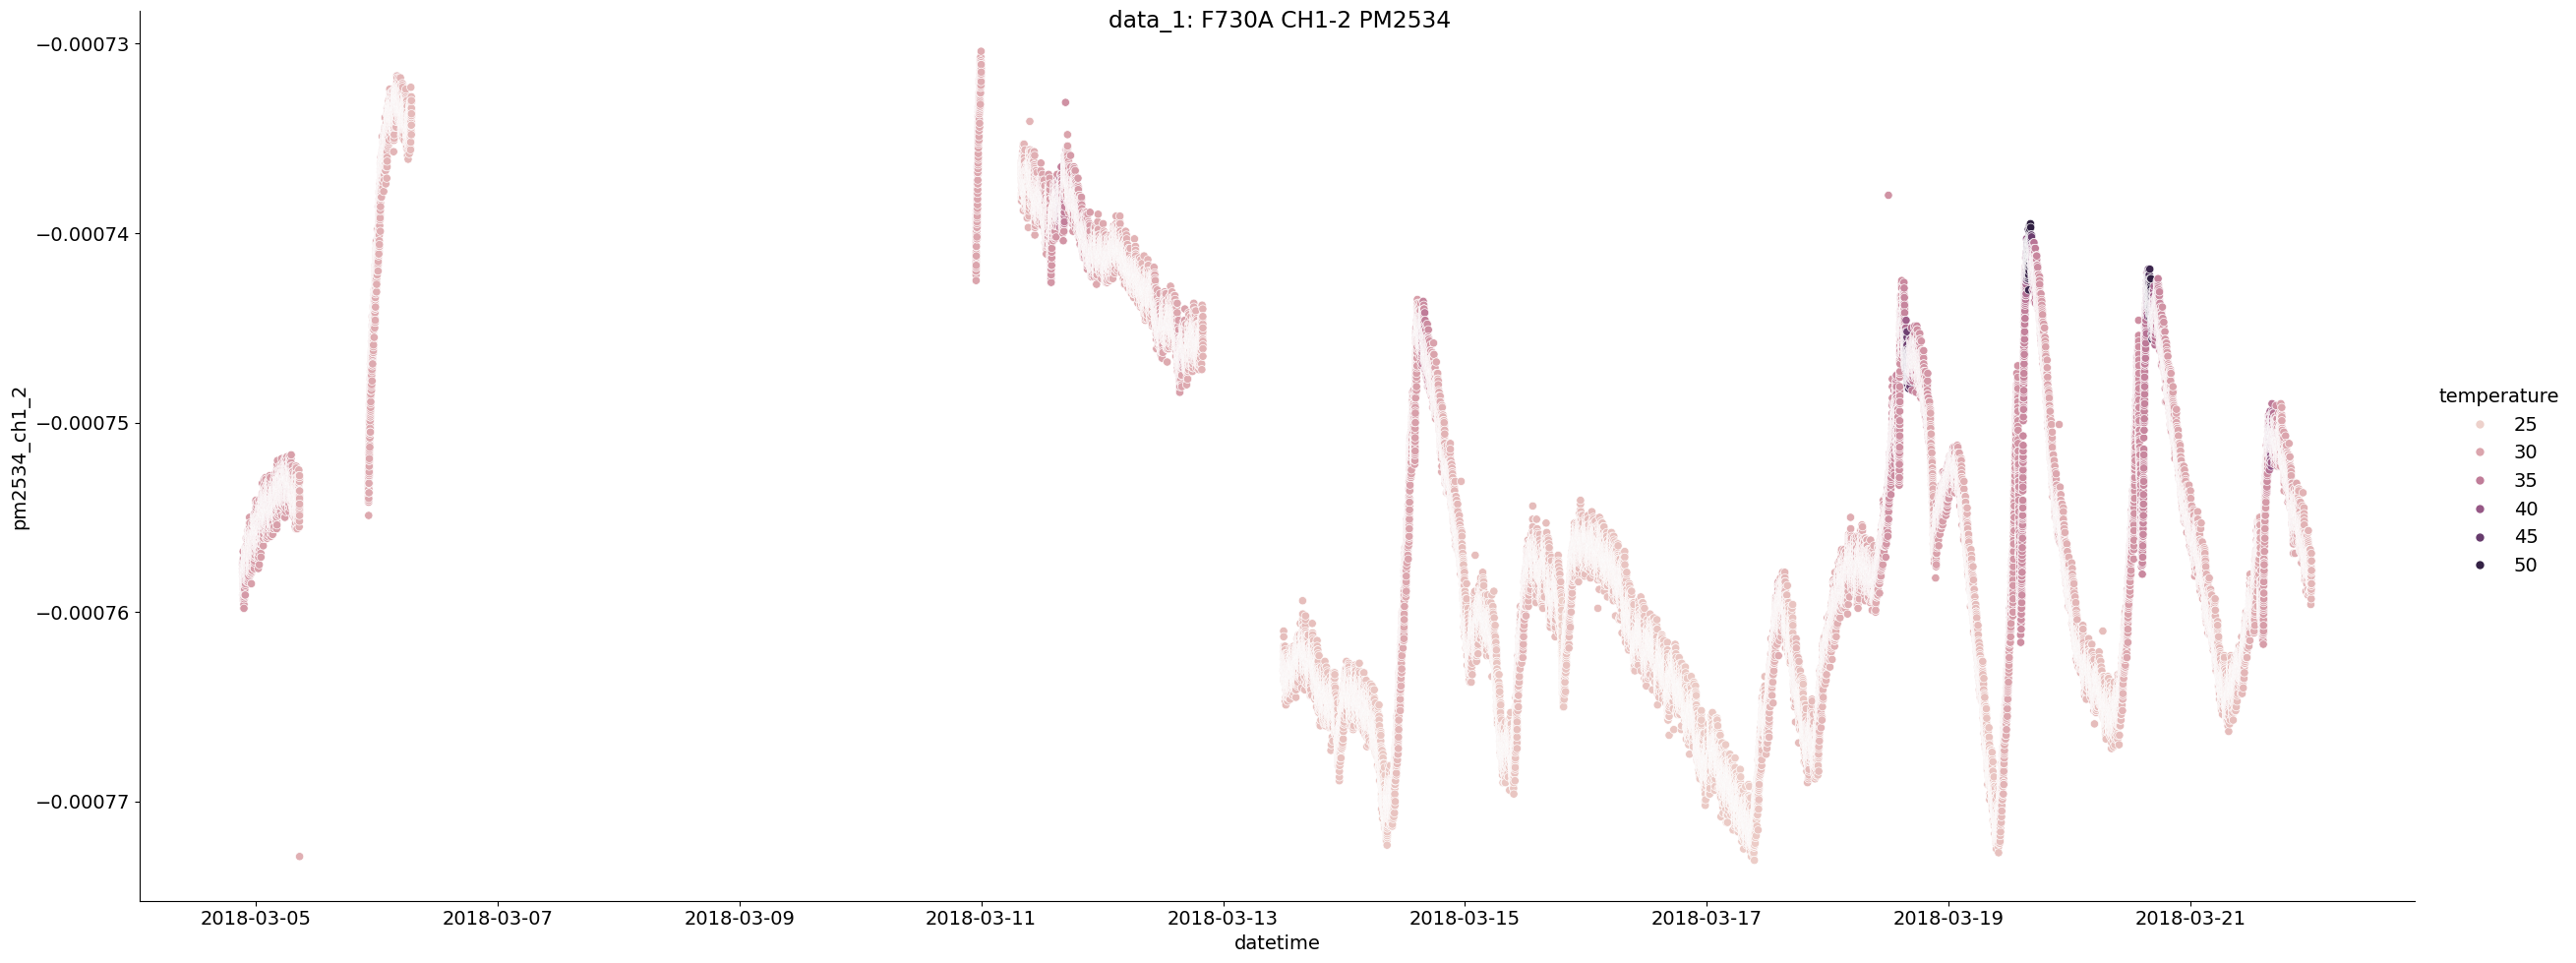

In [56]:
old_data_1_ch_1_2_pm2534 = old_data_1[(old_data_1.pm2534_ch1_2 > -0.0008) & (old_data_1.index < pd.Timestamp(2018,3,22)) & ~((old_data_1.index < pd.Timestamp(2018,3,13,12)) & (old_data_1.index > pd.Timestamp(2018,3,12,20))) & ~((old_data_1.index < pd.Timestamp(2018,3,11,8)) & (old_data_1.index > pd.Timestamp(2018,3,11,0)))]
rel = sns.relplot(data=old_data_1_ch_1_2_pm2534.reset_index(), x='datetime', y='pm2534_ch1_2', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1-2 PM2534')
old_data_1_ch_1_2_pm2534['pm2534_ch1_2'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    188898.000000
mean          0.000093
std           0.000010
min           0.000053
25%           0.000086
50%           0.000094
75%           0.000100
max           0.000120
Name: k199_ch1_3, dtype: float64

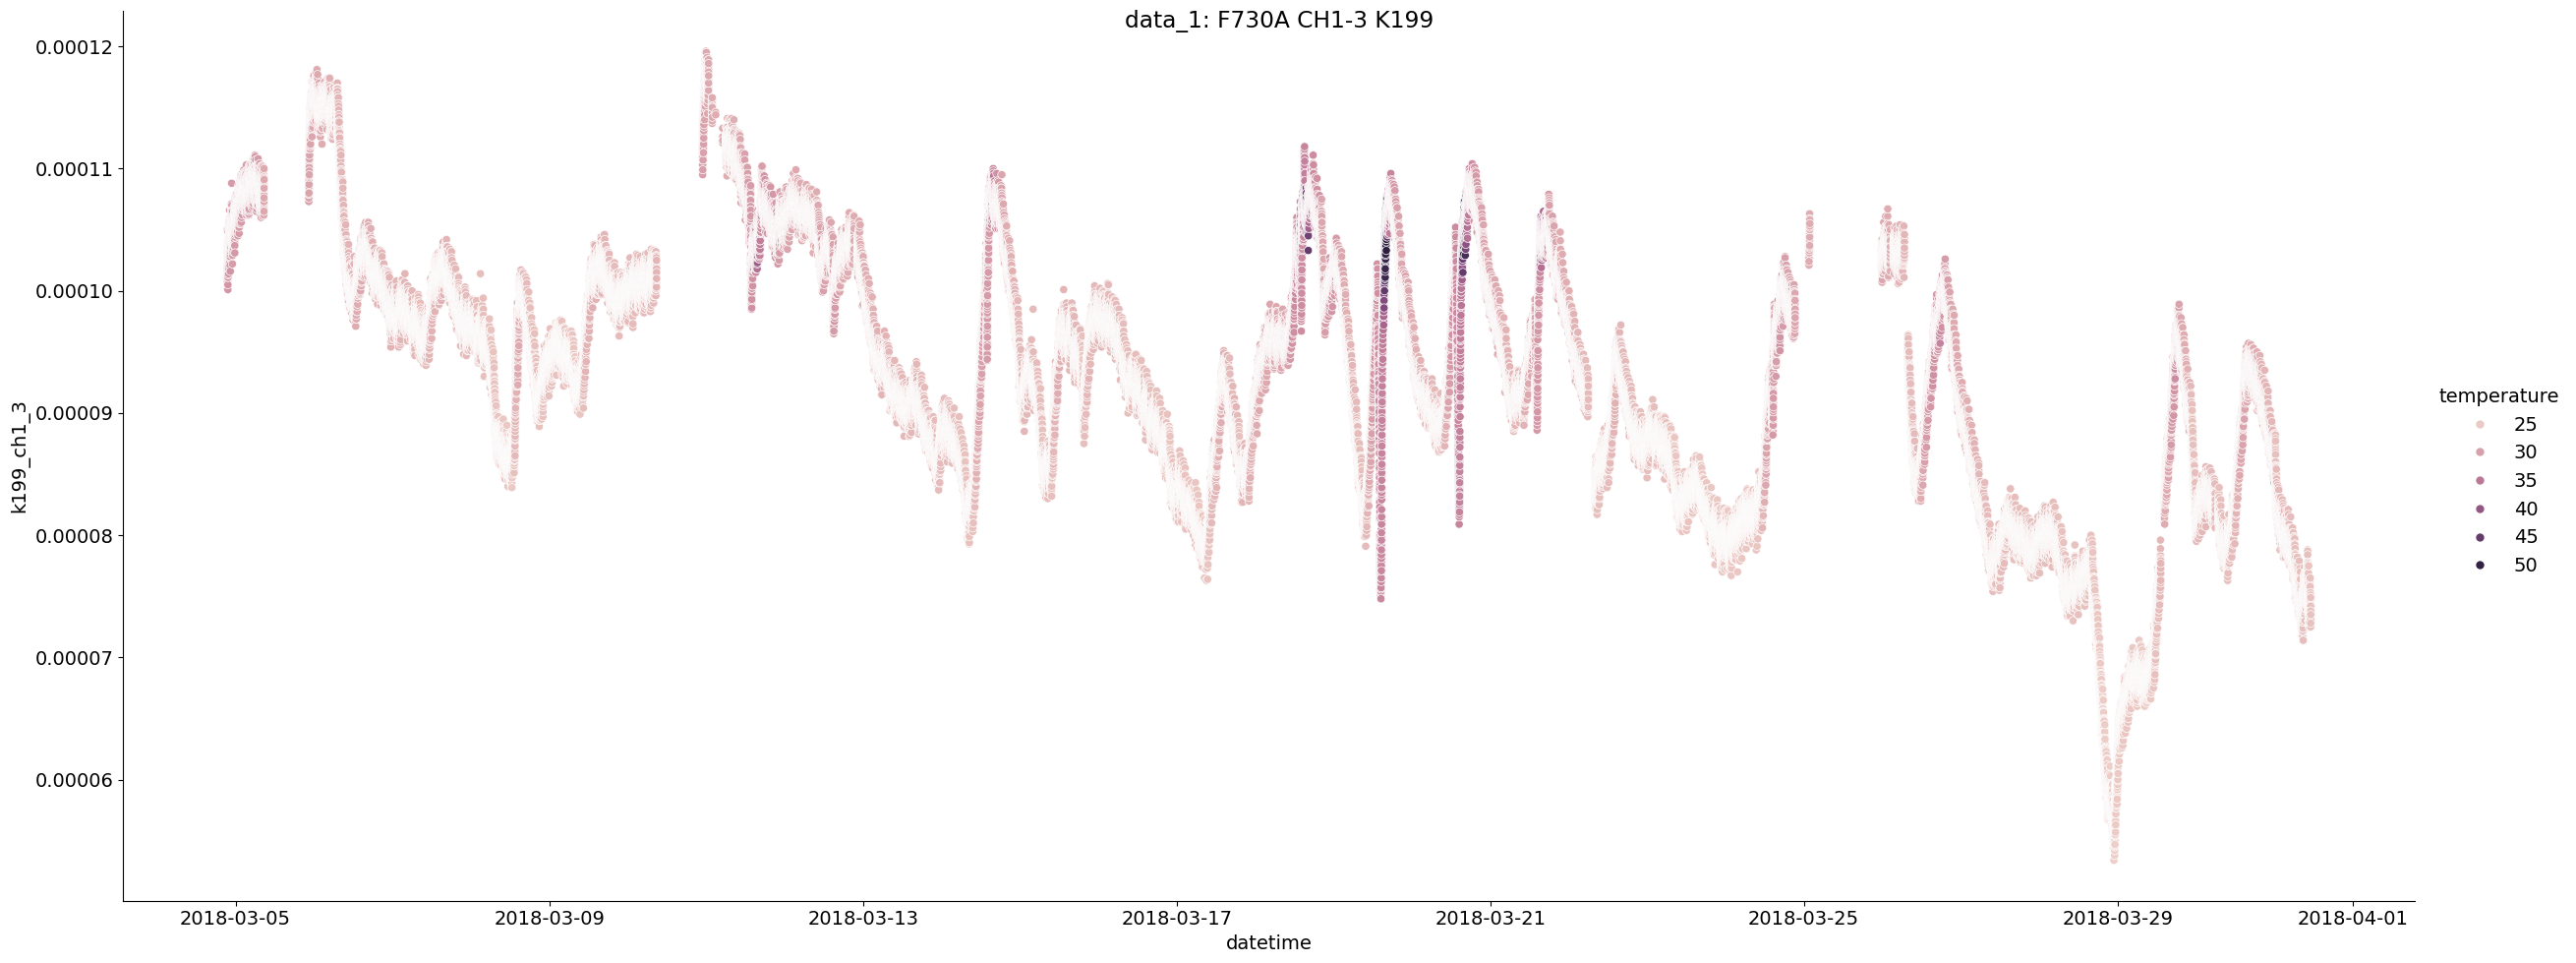

In [57]:
old_data_1_ch1_3_k199 = old_data_1[old_data_1.k199_ch1_3 < 0.00015]
rel = sns.relplot(data=old_data_1_ch1_3_k199.reset_index(), x='datetime', y='k199_ch1_3', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1-3 K199')
old_data_1_ch1_3_k199['k199_ch1_3'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    188899.000000
mean         -0.000320
std           0.000036
min          -0.000425
25%          -0.000344
50%          -0.000322
75%          -0.000301
max          -0.000230
Name: k199_ch1_4, dtype: float64

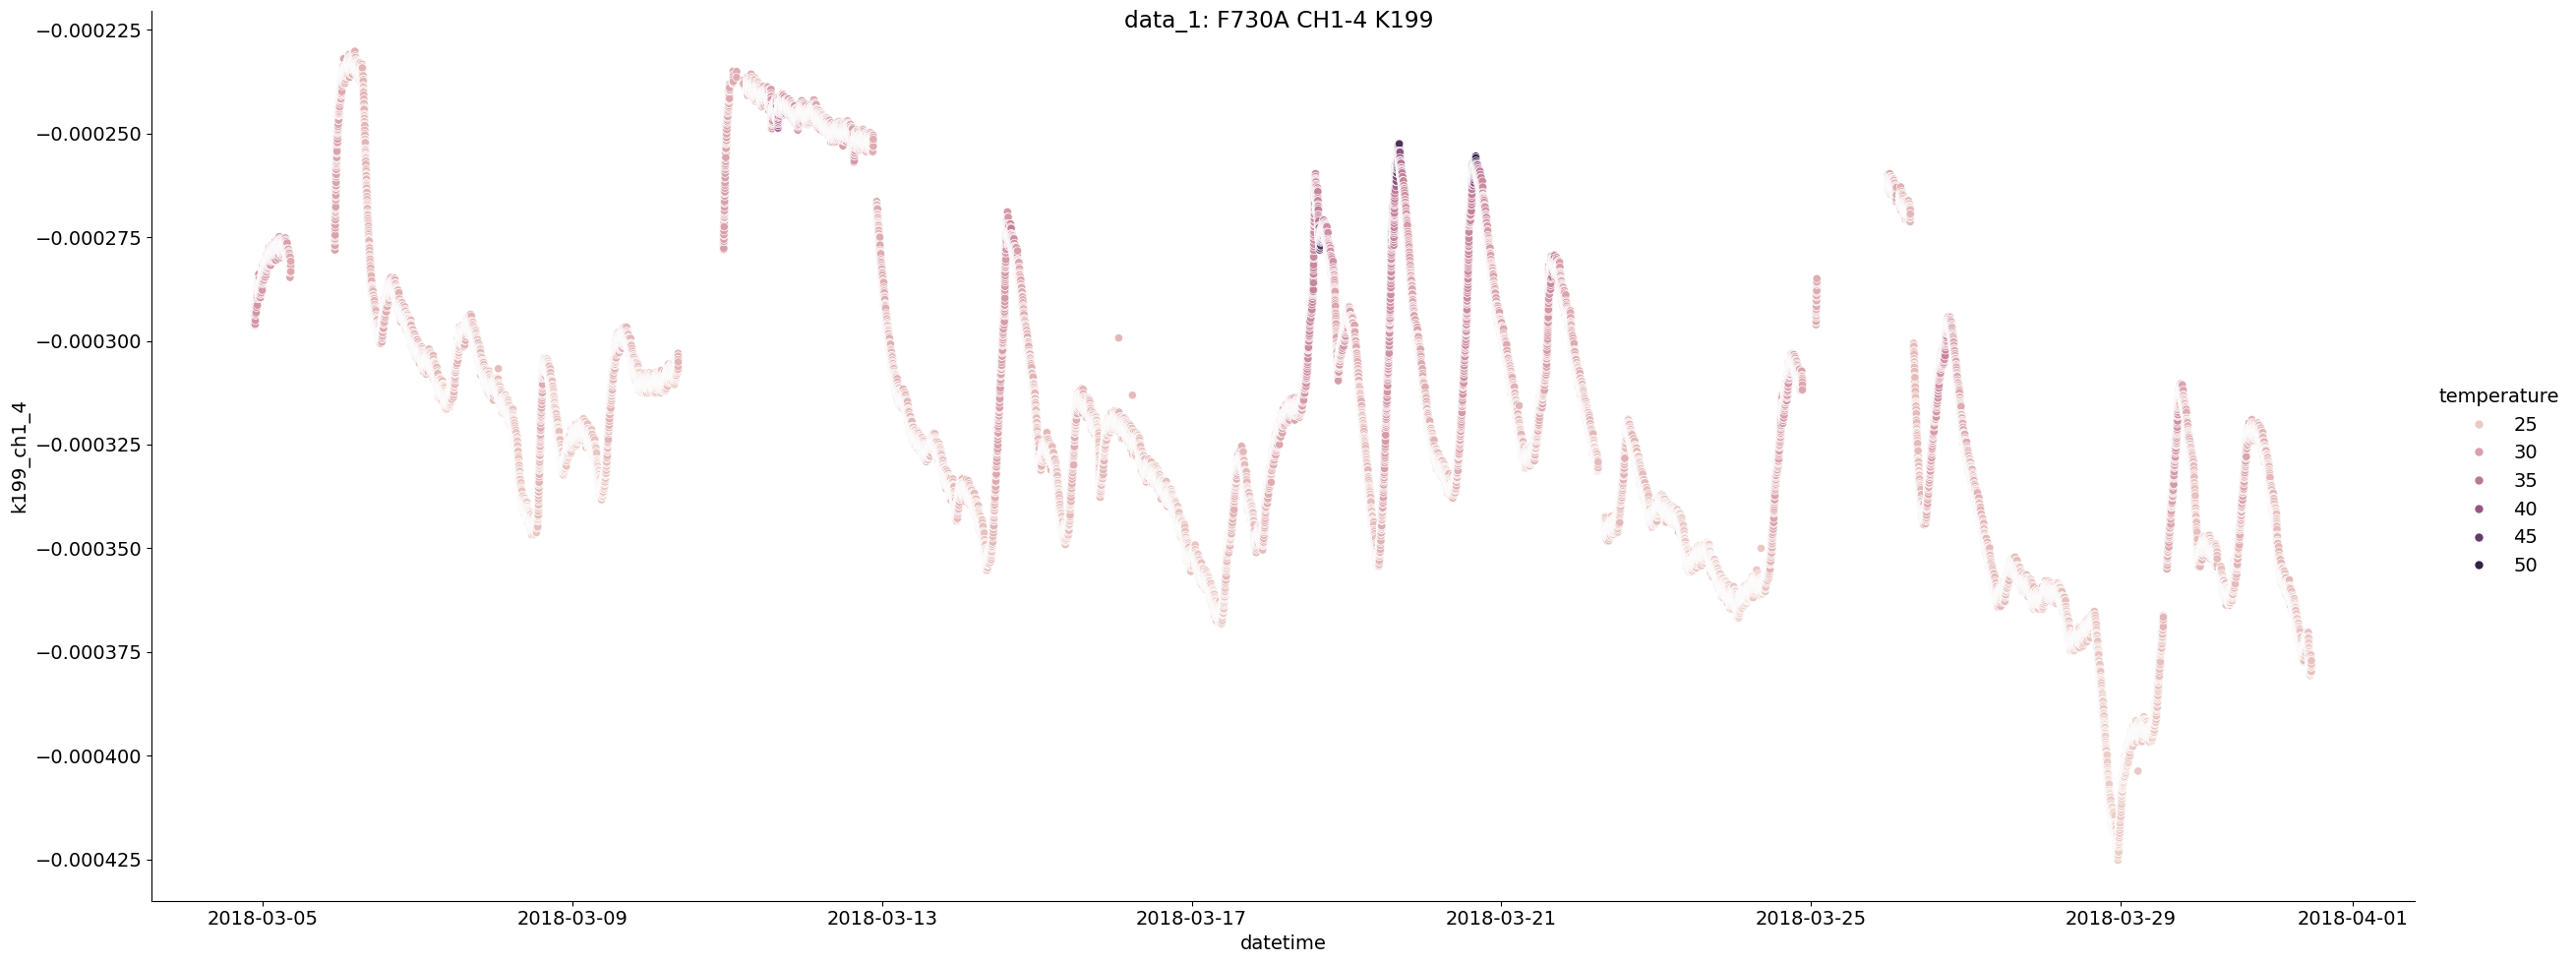

In [58]:
rel = sns.relplot(data=old_data_1.reset_index(), x='datetime', y='k199_ch1_4', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_1: F730A CH1-4 K199')
old_data_1['k199_ch1_4'].describe()

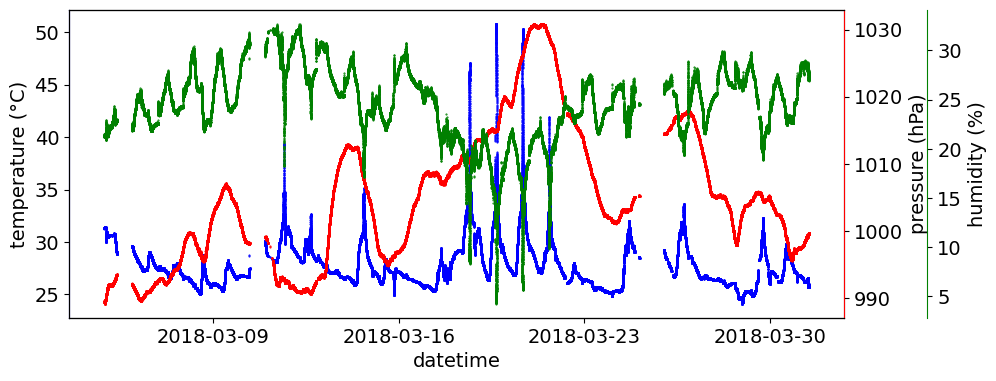

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(old_data_1.index, old_data_1.temperature, color='blue', marker='.', s=1)
ax1.set_ylabel('temperature (°C)')
ax1.set_xlabel('datetime')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2 = ax1.twinx()
ax2.scatter(old_data_1.index, old_data_1.pressure, color='red', marker='.', s=1)
ax3 = ax1.twinx()
ax3.scatter(old_data_1.index, old_data_1.humidity, color='green', marker='.', s=1)
ax3.spines['right'].set_position(('outward', 60))
ax1.spines['left'].set_color('blue')
ax2.spines['right'].set_color('red')
ax3.spines['right'].set_color('green')
ax2.set_ylabel('pressure (hPa)')
ax3.set_ylabel('humidity (%)')
plt.show()

## 2018-04

In [60]:
old_data_2

pm2534_ch1_mv106  k199_ch1_3  k199_ch1_4  \
datetime                                                               
2018-04-01 21:01:08.891744          0.000151    0.000090   -0.000340   
2018-04-01 21:01:20.570147          0.000151    0.000091   -0.000341   
2018-04-01 21:01:32.727240          0.000149    0.000088   -0.000341   
2018-04-01 21:01:44.377812          0.000152    0.000089   -0.000341   
2018-04-01 21:01:56.039913          0.000149    0.000089   -0.000340   
...                                      ...         ...         ...   
2018-04-29 23:40:37.271897          0.002493    0.002661    0.002591   
2018-04-29 23:40:54.767668          0.002695    0.002778    0.002730   
2018-04-29 23:41:06.434604          0.003007    0.003024    0.003019   
2018-04-29 23:41:18.104207          0.003689    0.003784    0.003722   
2018-04-29 23:41:29.787300          0.003551    0.003613    0.003849   

                            ag3458a_1_ch1  temp_1                 last_acal_1  \
datetime                                                                        
2018-04-01 21:01:08.891744       9.999996    41.6  2018-04-01T20:58:08.525181   
2018-04-01 21:01:20.570147       9.999994    41.6  2018-04-01T20:58:08.525181   
2018-04-01 21:01:32.727240       9.999996    41.6  2018-04-01T20:58:08.525181   
2018-04-01 21:01:44.377812       9.999996    41.7  2018-04-01T20:58:08.525181   
2018-04-01 21:01:56.039913       9.999996    41.6  2018-04-01T20:58:08.525181   
...                                   ...     ...                         ...   
2018-04-29 23:40:37.271897       9.997506    45.2  2018-04-29T23:02:34.728112   
2018-04-29 23:40:54.767668       9.997299    45.2  2018-04-29T23:02:34.728112   
2018-04-29 23:41:06.434604       9.996653    45.2  2018-04-29T23:02:34.728112   
2018-04-29 23:41:18.104207       9.996285    45.2  2018-04-29T23:02:34.728112   
2018-04-29 23:41:29.787300       9.996307    45.2  2018-04-29T23:02:34.728112   

                            last_acal_1_cal72  ag3458a_2_ch3  temp_2  \
datetime                                                               
2018-04-01 21:01:08.891744           1.000713      10.000078    45.2   
2018-04-01 21:01:20.570147           1.000713      10.000078    45.2   
2018-04-01 21:01:32.727240           1.000713      10.000078    45.2   
2018-04-01 21:01:44.377812           1.000713      10.000078    45.2   
2018-04-01 21:01:56.039913           1.000713      10.000078    45.2   
...                                       ...            ...     ...   
2018-04-29 23:40:37.271897           1.000715      10.000086    48.4   
2018-04-29 23:40:54.767668           1.000715      10.000087    48.4   
2018-04-29 23:41:06.434604           1.000715      10.000086    48.4   
2018-04-29 23:41:18.104207           1.000715      10.000086    48.4   
2018-04-29 23:41:29.787300           1.000715      10.000086    48.4   

                                           last_acal_2  last_acal_2_cal72  \
datetime                                                                    
2018-04-01 21:01:08.891744  2018-04-01T20:58:08.542323           0.999414   
2018-04-01 21:01:20.570147  2018-04-01T20:58:08.542323           0.999414   
2018-04-01 21:01:32.727240  2018-04-01T20:58:08.542323           0.999414   
2018-04-01 21:01:44.377812  2018-04-01T20:58:08.542323           0.999414   
2018-04-01 21:01:56.039913  2018-04-01T20:58:08.542323           0.999414   
...                                                ...                ...   
2018-04-29 23:40:37.271897  2018-04-29T23:02:34.743897           0.999412   
2018-04-29 23:40:54.767668  2018-04-29T23:02:34.743897           0.999412   
2018-04-29 23:41:06.434604  2018-04-29T23:02:34.743897           0.999412   
2018-04-29 23:41:18.104207  2018-04-29T23:02:34.743897           0.999412   
2018-04-29 23:41:29.787300  2018-04-29T23:02:34.743897           0.999412   

                            temperature     pressure   humidity  
datetime                        

In [61]:
old_data_2_acal = old_data_2[(old_data_2.last_acal_2 != old_data_2.last_acal_2.shift(1)) & (old_data_2.ag3458a_1_ch1 > 9.9995)]

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    177810.000000
mean         10.000008
std           0.000020
min           9.999912
25%           9.999991
50%           9.999996
75%          10.000024
max          10.000055
Name: ag3458a_1_ch1, dtype: float64

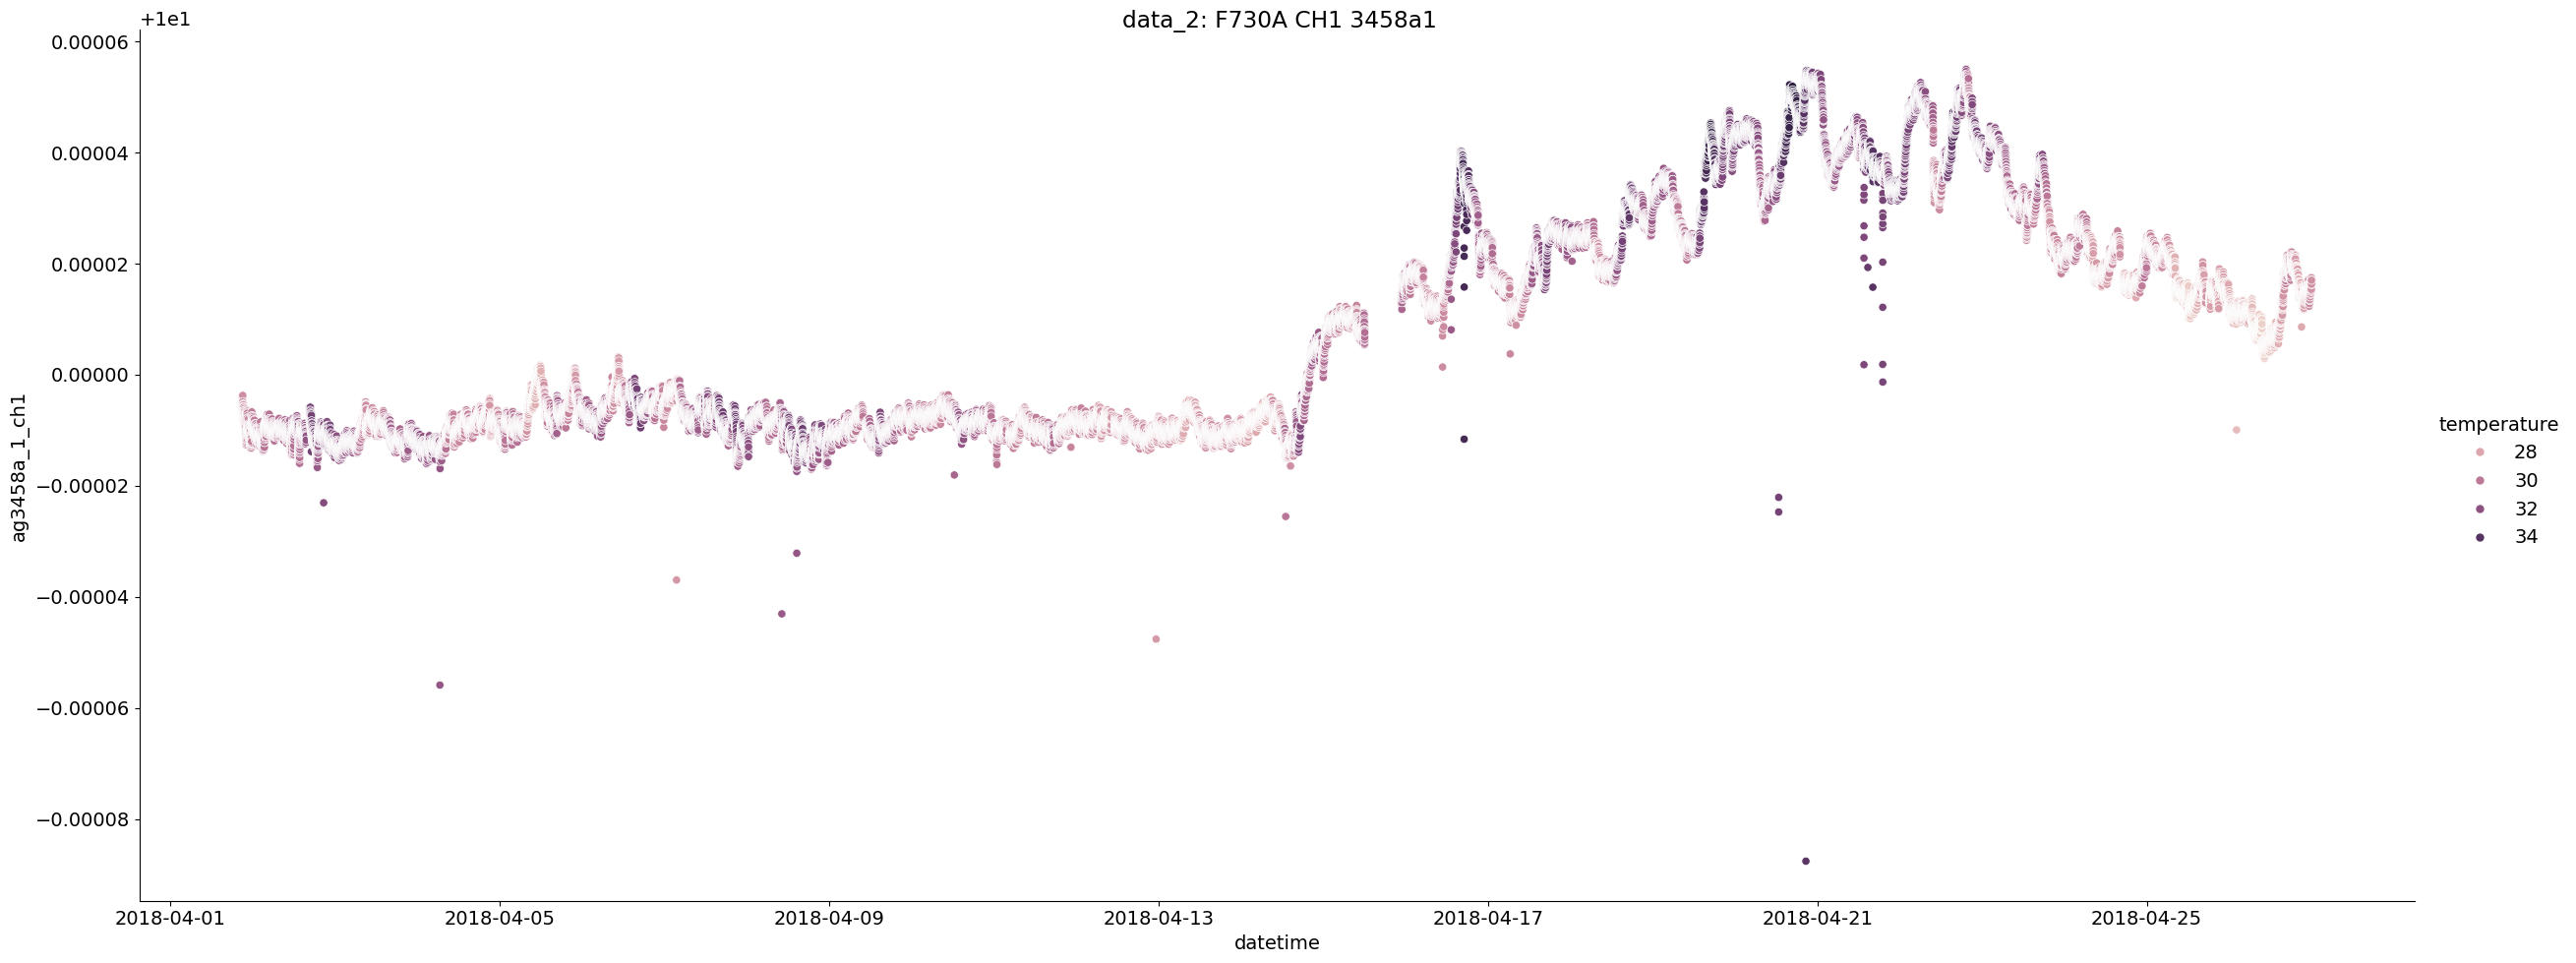

In [62]:
old_data_2_ch1_ag3458a_1 = old_data_2[(old_data_2.index < pd.Timestamp(2018,4,27)) & (old_data_2.ag3458a_1_ch1 > 10-0.0001)]
rel = sns.relplot(data=old_data_2_ch1_ag3458a_1.reset_index(), x='datetime', y='ag3458a_1_ch1', hue='temperature',  height=10, aspect=2.5)
rel.fig.suptitle('data_2: F730A CH1 3458a1')
old_data_2_ch1_ag3458a_1['ag3458a_1_ch1'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    110.000000
mean      10.000011
std        0.000019
min        9.999988
25%        9.999993
50%       10.000011
75%       10.000025
max       10.000052
Name: ag3458a_1_ch1, dtype: float64

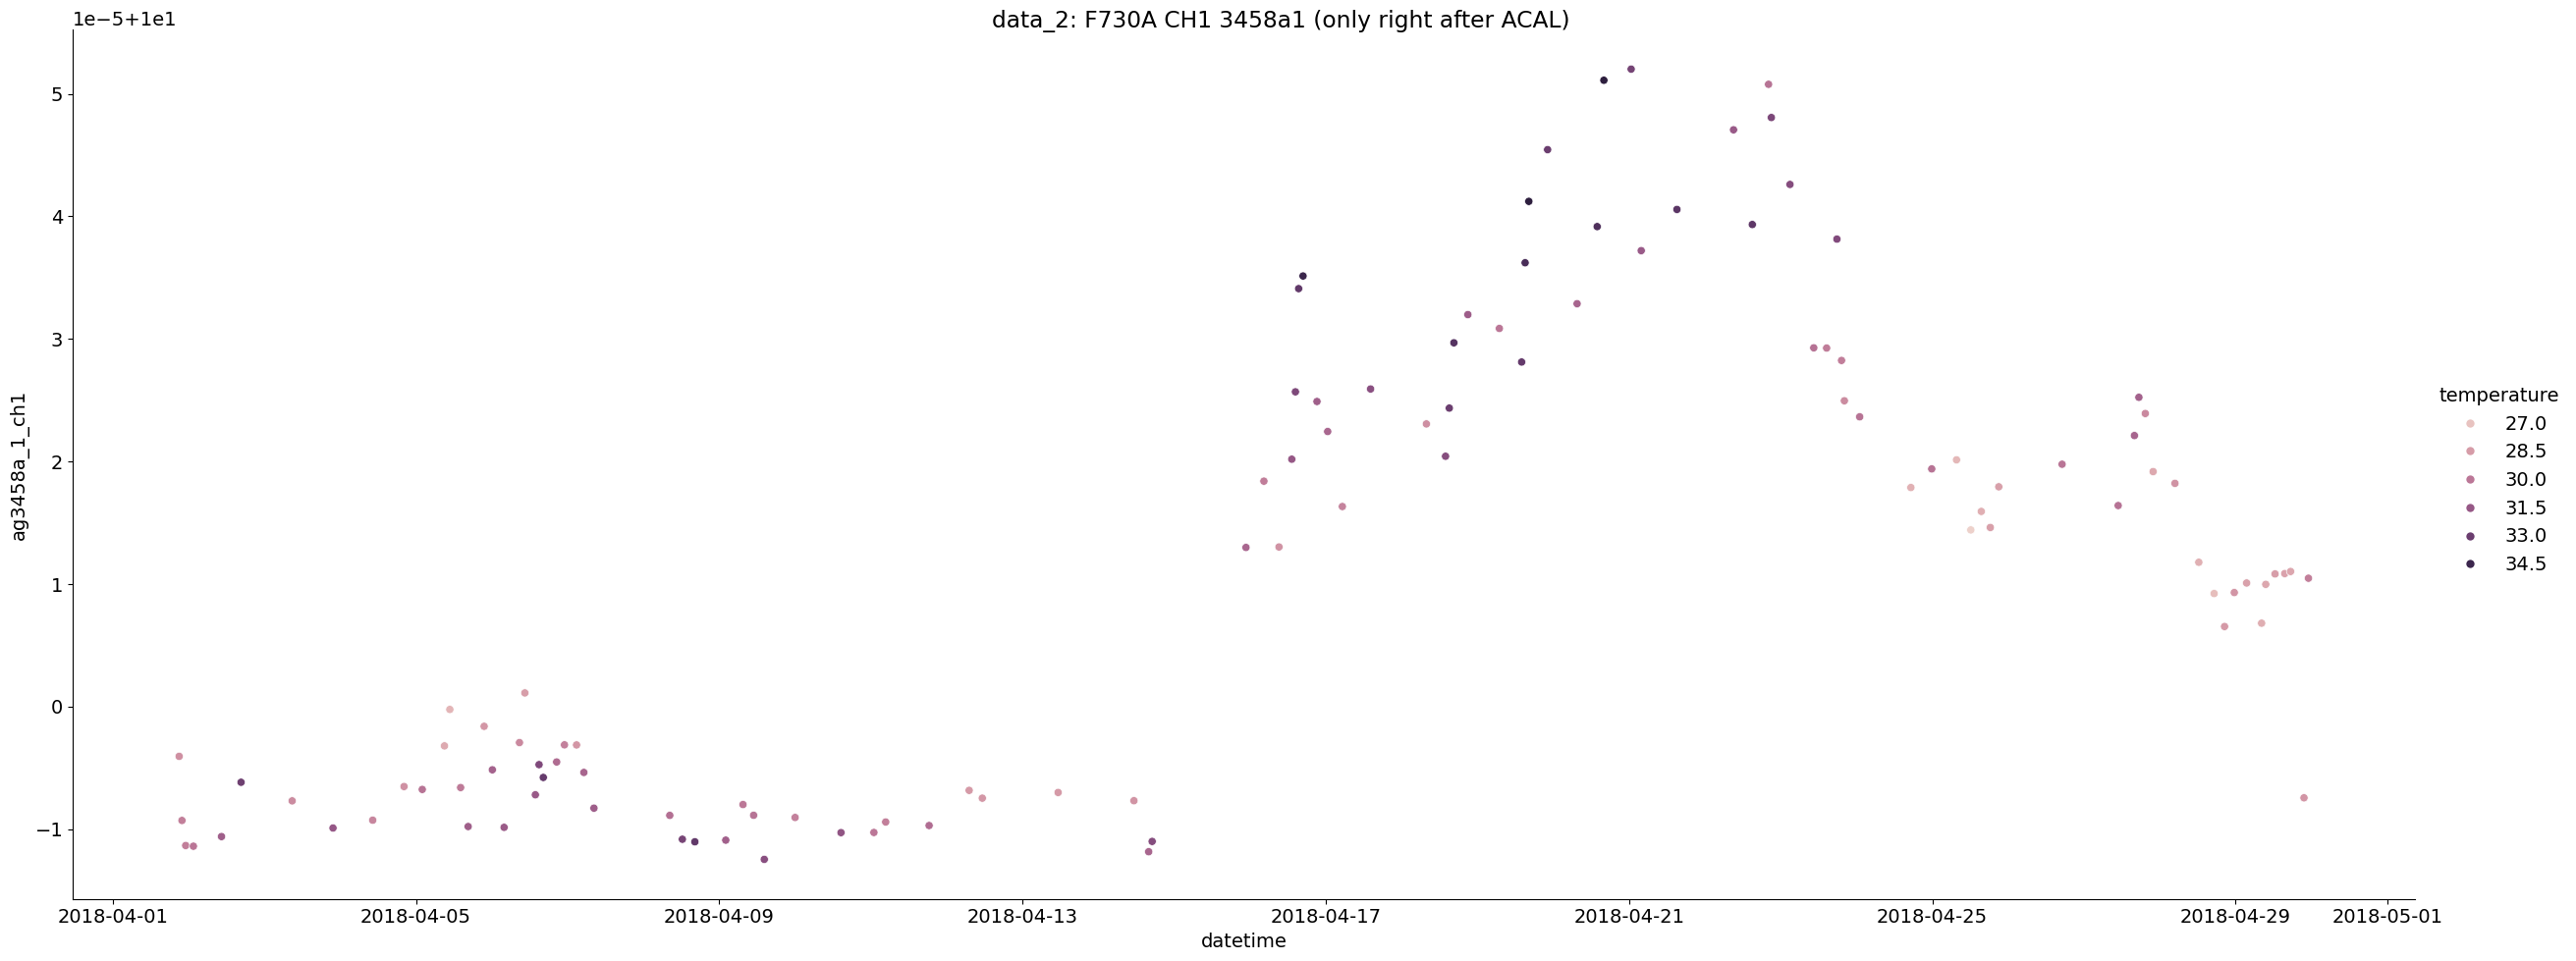

In [63]:
rel = sns.relplot(data=old_data_2_acal.reset_index(), x='datetime', y='ag3458a_1_ch1', hue='temperature',  height=10, aspect=2.5)
rel.fig.suptitle('data_2: F730A CH1 3458a1 (only right after ACAL)')
old_data_2_acal['ag3458a_1_ch1'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    194866.000000
mean         10.000087
std           0.000006
min          10.000044
25%          10.000082
50%          10.000086
75%          10.000094
max          10.000103
Name: ag3458a_2_ch3, dtype: float64

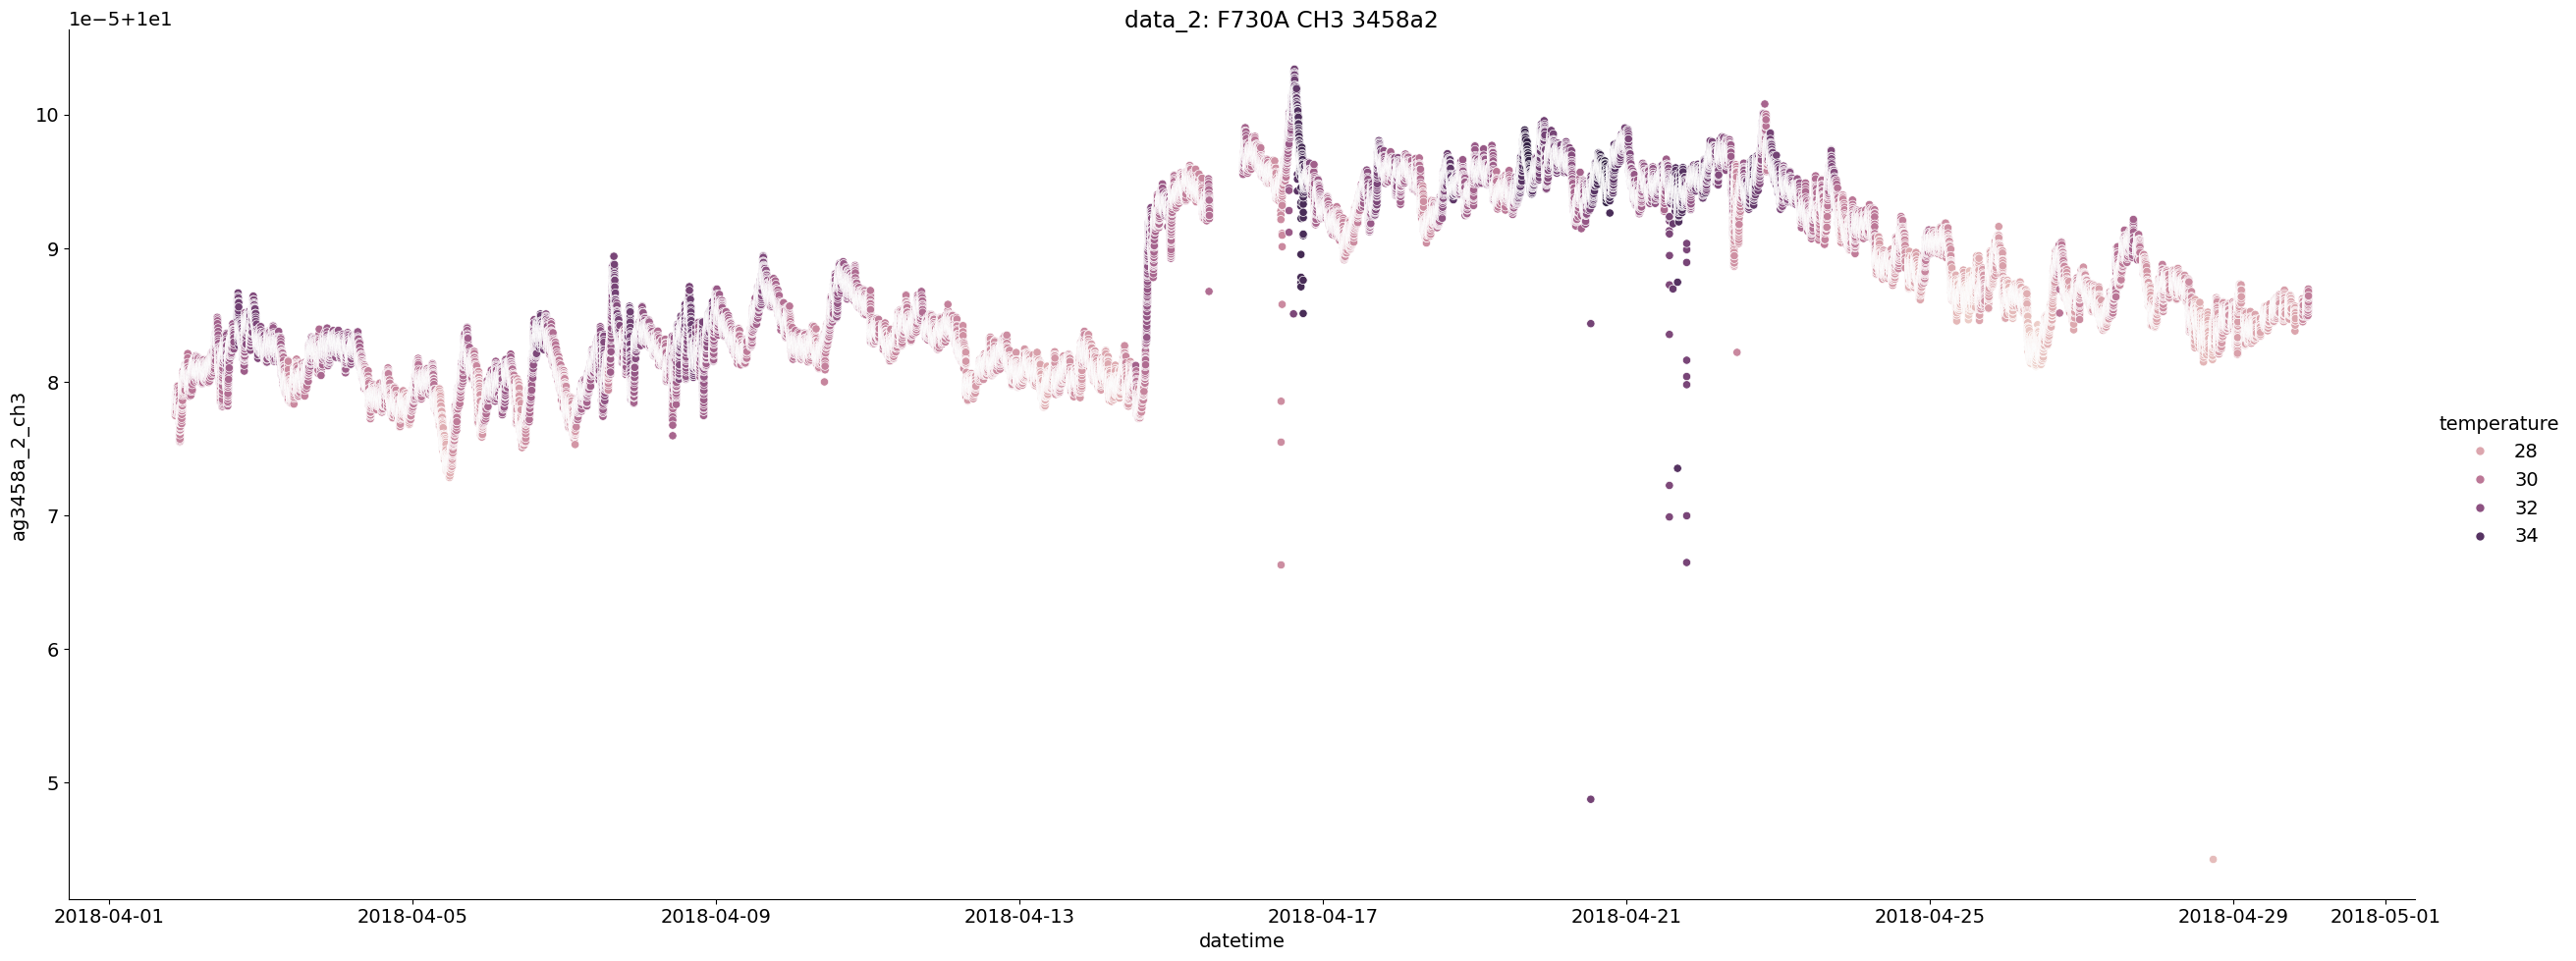

In [64]:
old_data_2_ch3_ag3458a_2 = old_data_2[old_data_2.ag3458a_2_ch3 > 9.99997]
rel = sns.relplot(data=old_data_2_ch3_ag3458a_2.reset_index(), x='datetime', y='ag3458a_2_ch3', hue='temperature',  height=10, aspect=2.5)
rel.fig.suptitle('data_2: F730A CH3 3458a2')
old_data_2_ch3_ag3458a_2['ag3458a_2_ch3'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    110.000000
mean      10.000087
std        0.000007
min       10.000074
25%       10.000082
50%       10.000085
75%       10.000093
max       10.000102
Name: ag3458a_2_ch3, dtype: float64

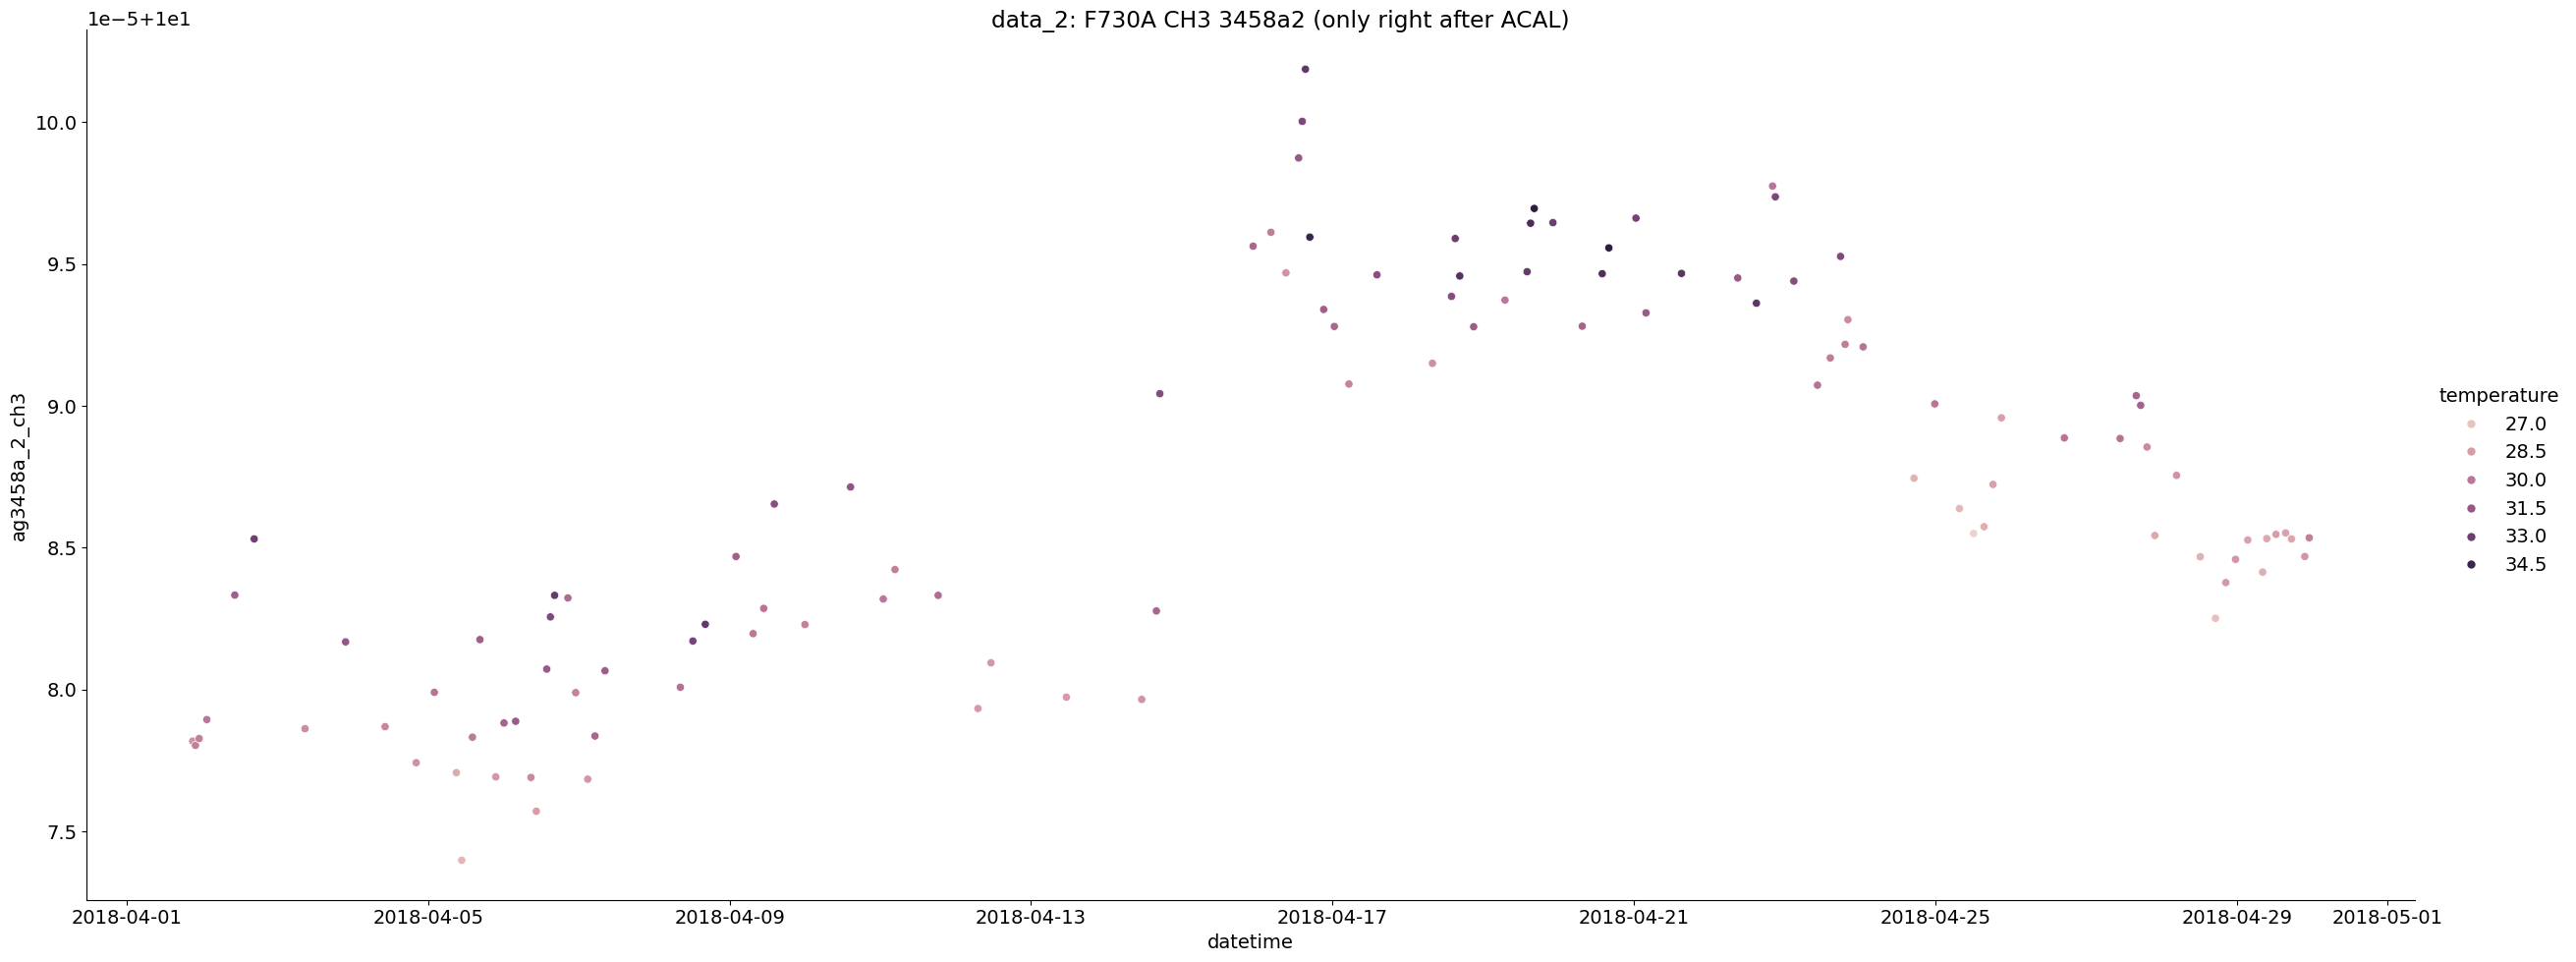

In [65]:
rel = sns.relplot(data=old_data_2_acal.reset_index(), x='datetime', y='ag3458a_2_ch3', hue='temperature',  height=10, aspect=2.5)
rel.fig.suptitle('data_2: F730A CH3 3458a2 (only right after ACAL)')
old_data_2_acal['ag3458a_2_ch3'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    177815.000000
mean          0.000086
std           0.000016
min          -0.000012
25%           0.000072
50%           0.000094
75%           0.000100
max           0.000169
Name: k199_ch1_3, dtype: float64

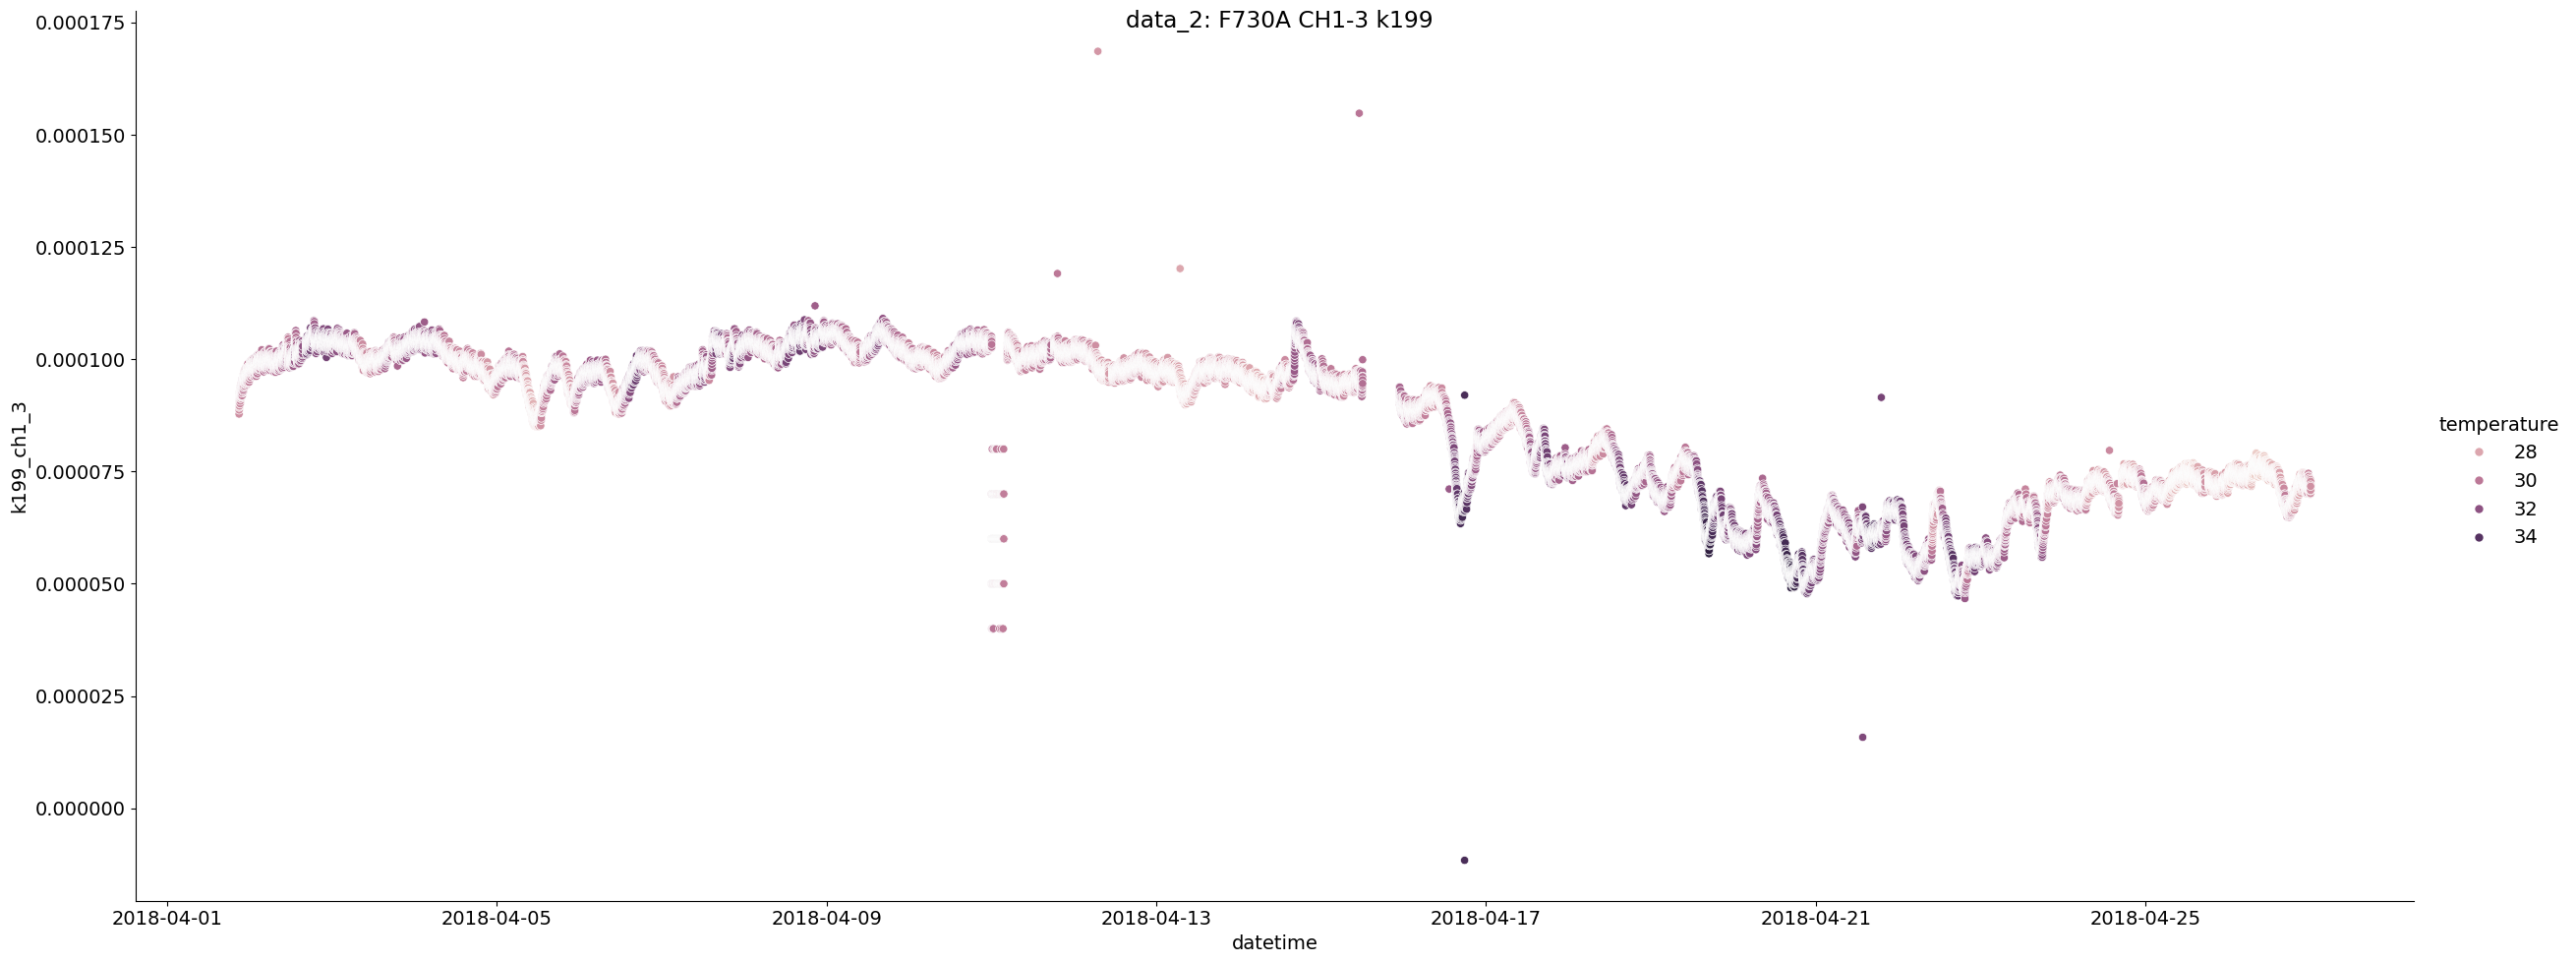

In [66]:
old_data_2_ch1_3_k199 = old_data_2[(old_data_2.index < pd.Timestamp(2018,4,27))]
rel = sns.relplot(data=old_data_2_ch1_3_k199.reset_index(), x='datetime', y='k199_ch1_3', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_2: F730A CH1-3 k199')
old_data_2_ch1_3_k199['k199_ch1_3'].describe()

/home/alson/shared/projects/personal/electronics/t&m/automation/data-analysis/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


count    116375.000000
mean         -0.000119
std           0.000134
min          -0.000345
25%          -0.000298
50%          -0.000065
75%          -0.000013
max           0.000071
Name: k199_ch1_4, dtype: float64

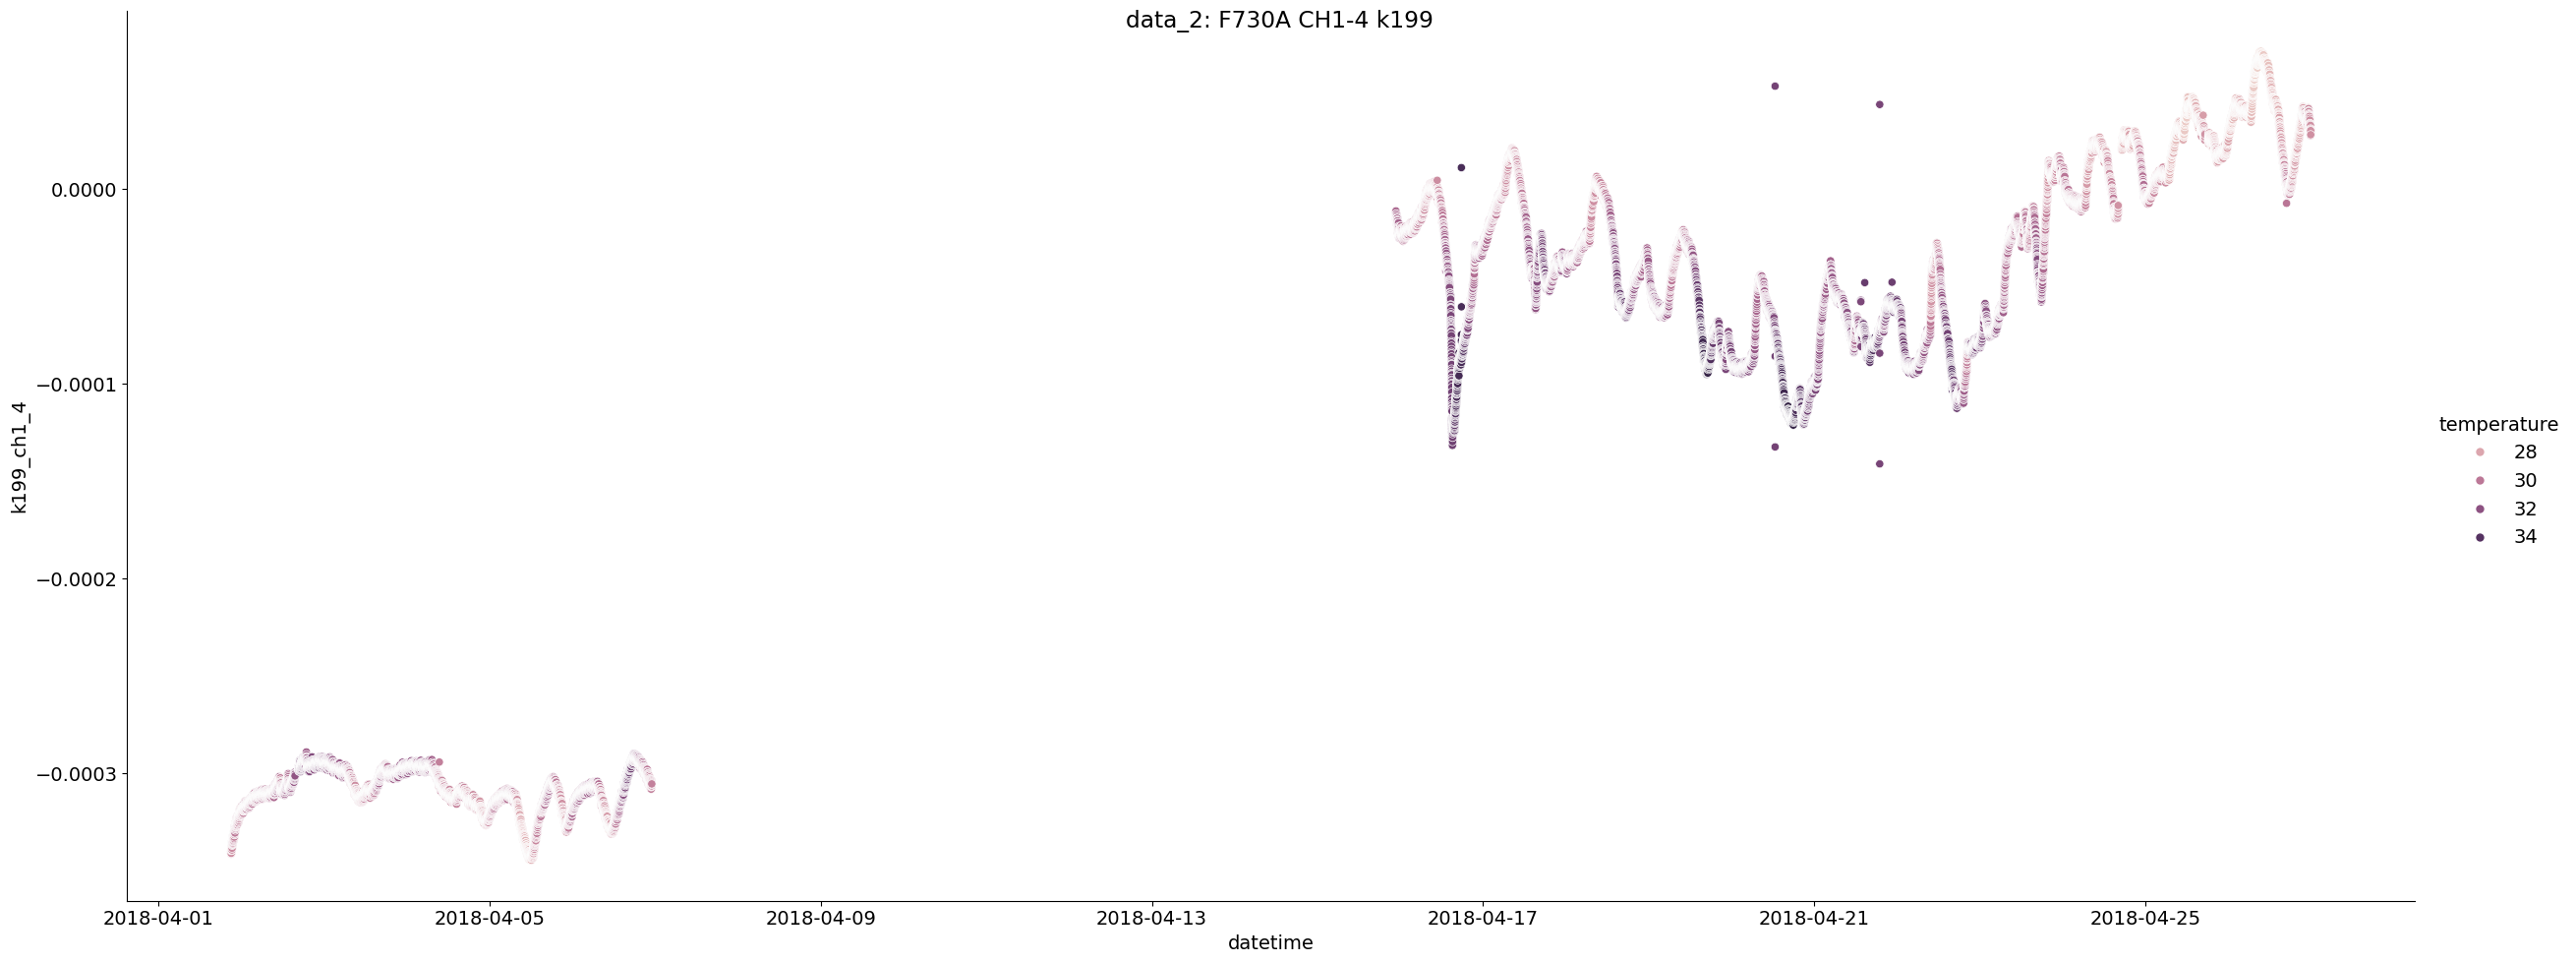

In [67]:
old_data_2_ch1_4_k199 = old_data_2[(old_data_2.index < pd.Timestamp(2018,4,6,23,0)) | ((old_data_2.index > pd.Timestamp(2018,4,15,12,15)) & (old_data_2.index < pd.Timestamp(2018,4,27)))]
rel = sns.relplot(data=old_data_2_ch1_4_k199.reset_index(), x='datetime', y='k199_ch1_4', hue='temperature', height=10, aspect=2.5)
rel.fig.suptitle('data_2: F730A CH1-4 k199')
old_data_2_ch1_4_k199['k199_ch1_4'].describe()

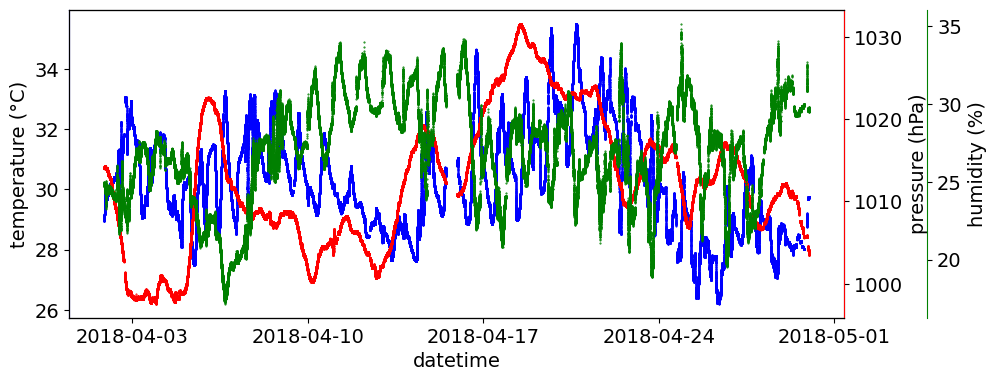

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(old_data_2.index, old_data_2.temperature, color='blue', marker='.', s=1)
ax1.set_ylabel('temperature (°C)')
ax1.set_xlabel('datetime')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2 = ax1.twinx()
ax2.scatter(old_data_2.index, old_data_2.pressure, color='red', marker='.', s=1)
ax3 = ax1.twinx()
ax3.scatter(old_data_2.index, old_data_2.humidity, color='green', marker='.', s=1)
ax3.spines['right'].set_position(('outward', 60))
ax1.spines['left'].set_color('blue')
ax2.spines['right'].set_color('red')
ax3.spines['right'].set_color('green')
ax2.set_ylabel('pressure (hPa)')
ax3.set_ylabel('humidity (%)')
plt.show()

Text(0, 0.5, 'DCV (V)')

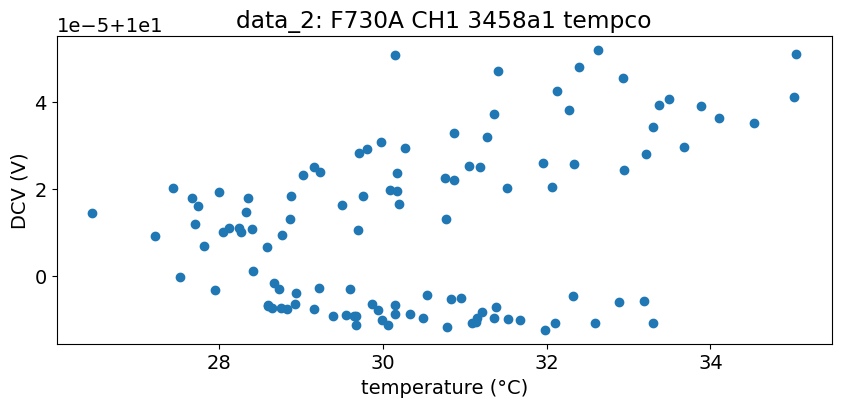

In [69]:
plt.scatter(old_data_2_acal.temperature, old_data_2_acal.ag3458a_1_ch1)
plt.title('data_2: F730A CH1 3458a1 tempco')
plt.xlabel(('temperature (°C)'))
plt.ylabel('DCV (V)')

Text(0, 0.5, 'DCV (V)')

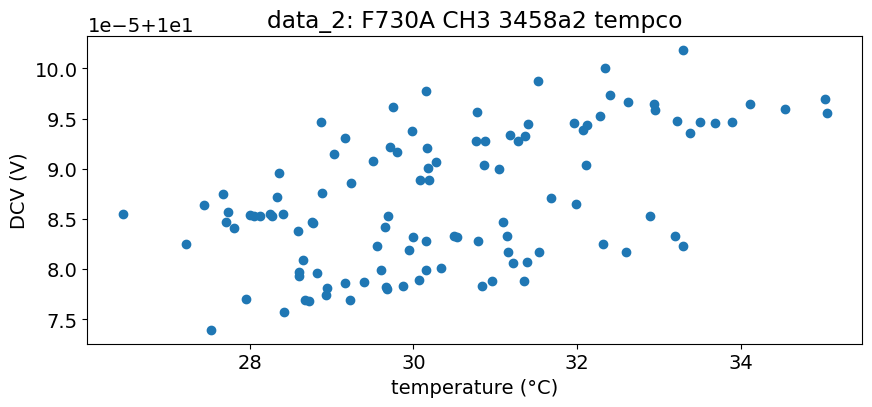

In [70]:
plt.scatter(old_data_2_acal.temperature, old_data_2_acal.ag3458a_2_ch3)
plt.title('data_2: F730A CH3 3458a2 tempco')
plt.xlabel(('temperature (°C)'))
plt.ylabel('DCV (V)')